## Data Overview

## Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split

%matplotlib inline 

## 1. Data Cleaning

In [3]:
df_hdb = pd.read_csv("Resale Flat Prices.csv")

In [4]:
df_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [5]:
df_hdb.shape

(142199, 11)

In [6]:
df_hdb.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,142199.000000,142199.000000,1.421990e+05
mean,97.683487,1995.446902,4.757634e+05
std,24.084213,13.681812,1.648296e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.550000e+05
50%,94.000000,1996.000000,4.450000e+05
75%,113.000000,2006.000000,5.600000e+05
max,249.000000,2019.000000,1.418000e+06


In [7]:
df_hdb.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
dtype: object

In [8]:
#No missing data found
df_hdb.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [9]:
# 265 duplicate records. However, it does not affect the data as it is not significant. We can make an assumption that many units were sold at the same price on one floor.
df_hdb.duplicated().value_counts()

False    141934
True        265
dtype: int64

## 2. Data Pre-processing 

**As column "remaining_lease" is in object, we need to change it to int64 and create a new column called "remaining_lease_in_years"**

In [10]:
def remaining_lease_clean(lease):                          #converting remaining_lease string data into float
    year = lease[:2]
    if 'months' in lease or 'month' in lease:              #some rows dont have a month aspect, so an if statement is used to filter them out first
        month = lease[-8]
        return int(year)+(int(month)/12)
    else:
        return int(year)    


df_hdb['remaining_lease_in_years']=df_hdb['remaining_lease'].apply(remaining_lease_clean)


**As column "month" is in object, we need to change it to int64 and create a new column called "year_bought"**

In [11]:
df_hdb['month'] = pd.to_datetime(df_hdb['month'])
df_hdb['year_bought'] = df_hdb['month'].dt.year


**Feature Engineering - Price per square metre**

In [12]:
#psm = per square metre
df_hdb['price_psm'] = df_hdb['resale_price']/df_hdb['floor_area_sqm']
df_hdb.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_years,year_bought,price_psm
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,61.333333,2017,5272.727273
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,60.583333,2017,3731.343284
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,62.416667,2017,3910.447761
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,62.000000,2017,3897.058824
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,62.416667,2017,3955.223881


## 3. Data Visualisation/Exploratory Data Analysis

In [13]:
sns.set()

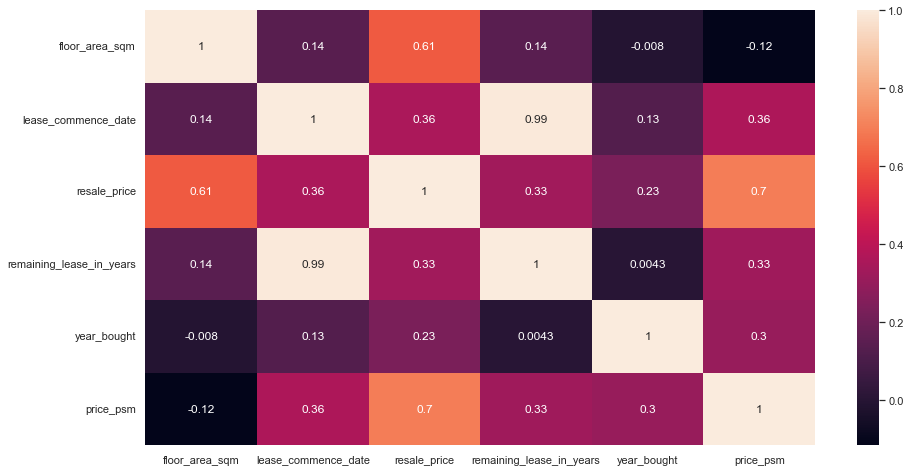

In [14]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(df_hdb.corr() , annot= True)


#visualizing correlation coefficients between the different features. Independent features will be all features excluding the resale price
#Among the independent features, lease_commence_date & remaining_lease_in_years are highly correlated to each other. Hence, lease_commence_date will be dropped as it is less useful to our analysis.

In [15]:
df_hdb.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [16]:
#west region (6)
west_region_towns = ['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST']
#north (3)
north_region_towns = ['SEMBAWANG','WOODLANDS','YISHUN']
#north east region (5)
northeast_region_towns = ['ANG MO KIO','PUNGGOL','SENGKANG','SERANGOON','HOUGANG']
#east region (3)
east_region_towns = ['BEDOK','PASIR RIS','TAMPINES']
#central region (9)
central_region_towns = ['BISHAN','BUKIT MERAH','BUKIT TIMAH','CENTRAL AREA','GEYLANG','KALLANG/WHAMPOA','MARINE PARADE','TOA PAYOH','QUEENSTOWN']

west_region = df_hdb.loc[(df_hdb['town'].isin(west_region_towns))]
north_region = df_hdb.loc[(df_hdb['town'].isin(north_region_towns))]
northeast_region = df_hdb.loc[(df_hdb['town'].isin(northeast_region_towns))]
east_region = df_hdb.loc[(df_hdb['town'].isin(east_region_towns))]
central_region = df_hdb.loc[(df_hdb['town'].isin(central_region_towns))]


In [17]:
town_list = df_hdb.town.tolist()

region_list = []
for x in town_list:
    for WestRegion in west_region_towns:
        if x == WestRegion:
            region_list.append('West')
            break

    for NorthRegion in north_region_towns:
        if x == NorthRegion:
            region_list.append('North')
            break
        

    for NorthEastRegion in northeast_region_towns:
        if x == NorthEastRegion:
            region_list.append('North East')
            break
    
    for EastRegion in east_region_towns:
        if x == EastRegion:
            region_list.append('East')
            break

    for CentralRegion in central_region_towns:
        if x == CentralRegion:
            region_list.append('Central')
            break

df_hdb['region'] = region_list
df_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_years,year_bought,price_psm,region
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,61.333333,2017,5272.727273,North East
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,60.583333,2017,3731.343284,North East
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,62.416667,2017,3910.447761,North East
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,62.000000,2017,3897.058824,North East
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,62.416667,2017,3955.223881,North East


region
Central       561859.770704
East          486557.478886
North         412909.081089
North East    474654.575436
West          442212.198021
Name: resale_price, dtype: float64


<AxesSubplot:title={'center':'Percentage of mean resale price by region from 2017 to 2022'}, ylabel='resale_price'>

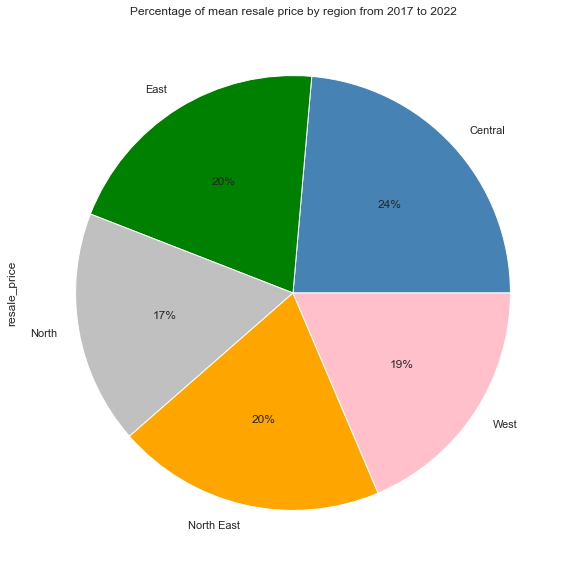

In [18]:
#sort by region to find out the mean resale price
mean_byregion = df_hdb.groupby('region')['resale_price'].mean()
print (mean_byregion)

mean_byregion.plot(kind='pie', y='region', autopct='%1.0f%%', colors= ['steelblue', 'green','silver','orange','pink'],
title = 'Percentage of mean resale price by region from 2017 to 2022', figsize=(10,10))            

Text(0, 0.5, 'Resale Price')

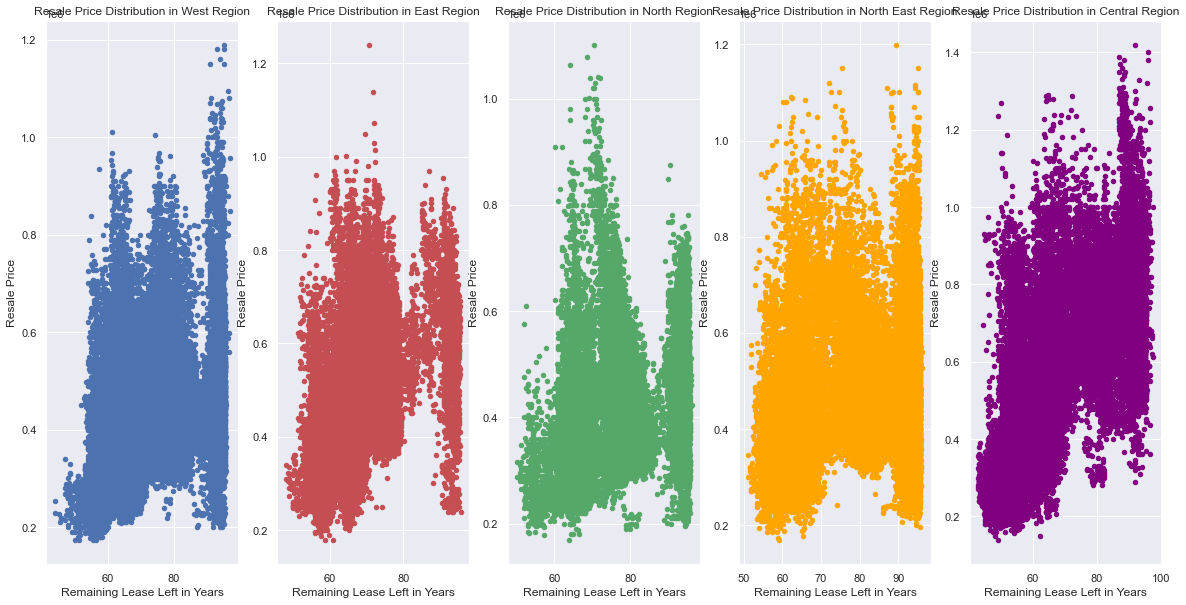

In [19]:
fig1, [ax0,ax1,ax2,ax3,ax4] = plt.subplots(nrows = 1, ncols = 5, figsize=(20,10))
west_region.plot(y= 'resale_price', x='remaining_lease_in_years', kind = 'scatter',ax=ax0, color='b')
ax0.set_title('Resale Price Distribution in West Region')
ax0.set_xlabel('Remaining Lease Left in Years')
ax0.set_ylabel('Resale Price')

east_region.plot(y= 'resale_price', x='remaining_lease_in_years', kind = 'scatter',ax=ax1, color='r')
ax1.set_title('Resale Price Distribution in East Region')
ax1.set_xlabel('Remaining Lease Left in Years')
ax1.set_ylabel('Resale Price')

north_region.plot(y= 'resale_price', x='remaining_lease_in_years', kind = 'scatter',ax=ax2, color='g')
ax2.set_title('Resale Price Distribution in North Region')
ax2.set_xlabel('Remaining Lease Left in Years')
ax2.set_ylabel('Resale Price')

northeast_region.plot(y= 'resale_price', x='remaining_lease_in_years', kind = 'scatter',ax=ax3, color='orange')
ax3.set_title('Resale Price Distribution in North East Region')
ax3.set_xlabel('Remaining Lease Left in Years')
ax3.set_ylabel('Resale Price')

central_region.plot(y= 'resale_price', x='remaining_lease_in_years', kind = 'scatter',ax=ax4, color='purple')
ax4.set_title('Resale Price Distribution in Central Region')
ax4.set_xlabel('Remaining Lease Left in Years')
ax4.set_ylabel('Resale Price')

#Visualizing the price distribution of all resale flats by region.

Text(0.5, 0.98, 'Statistical Price Distribution of Resale Flat Prices')

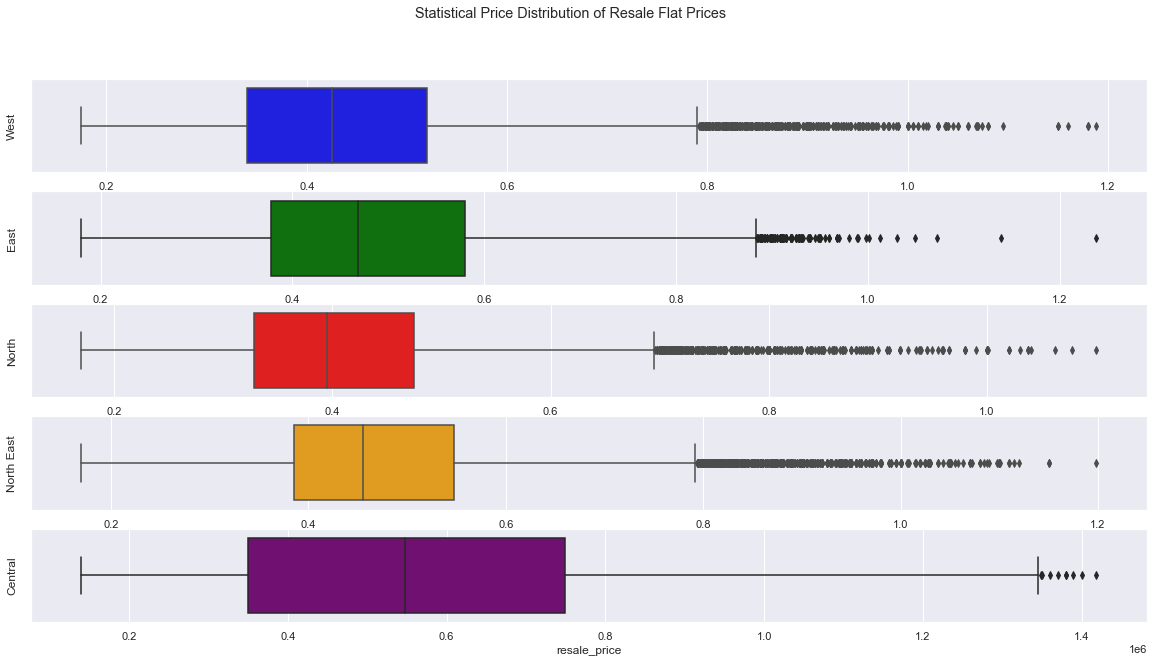

In [20]:
fig2, [ax0,ax1,ax2,ax3,ax4] = plt.subplots(nrows = 5, ncols = 1, figsize=(20,10))

sns.boxplot(data = west_region,x='resale_price', color = 'blue',ax=ax0)
ax0.set_ylabel('West')

sns.boxplot(data = east_region,x='resale_price', color = 'green',ax=ax1)
ax1.set_ylabel('East')

sns.boxplot(data = north_region,x='resale_price', color = 'red',ax=ax2)
ax2.set_ylabel('North')

sns.boxplot(data=northeast_region,x='resale_price', color = 'orange',ax=ax3 )
ax3.set_ylabel('North East')

sns.boxplot(data=central_region,x='resale_price', color = 'purple',ax=ax4)
ax4.set_ylabel('Central')


ax3.set_xlabel('Resale Price')
fig2.suptitle('Statistical Price Distribution of Resale Flat Prices')

#Statistical Distribution of Resale Flat Prices
#TO CONSIDER OUTLIERS. < ADD MORE REGIONS?>

In [21]:
df_hdb['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [22]:
one_room = df_hdb.loc[(df_hdb['flat_type']=='1 ROOM')]
two_room = df_hdb.loc[(df_hdb['flat_type']=='2 ROOM')]
three_room = df_hdb.loc[(df_hdb['flat_type']=='3 ROOM')]
four_room = df_hdb.loc[(df_hdb['flat_type']=='4 ROOM')]
five_room = df_hdb.loc[(df_hdb['flat_type']=='5 ROOM')]
executive = df_hdb.loc[(df_hdb['flat_type']=='EXECUTIVE')]
multi_generation = df_hdb.loc[(df_hdb['flat_type']=='MULTI-GENERATION')]

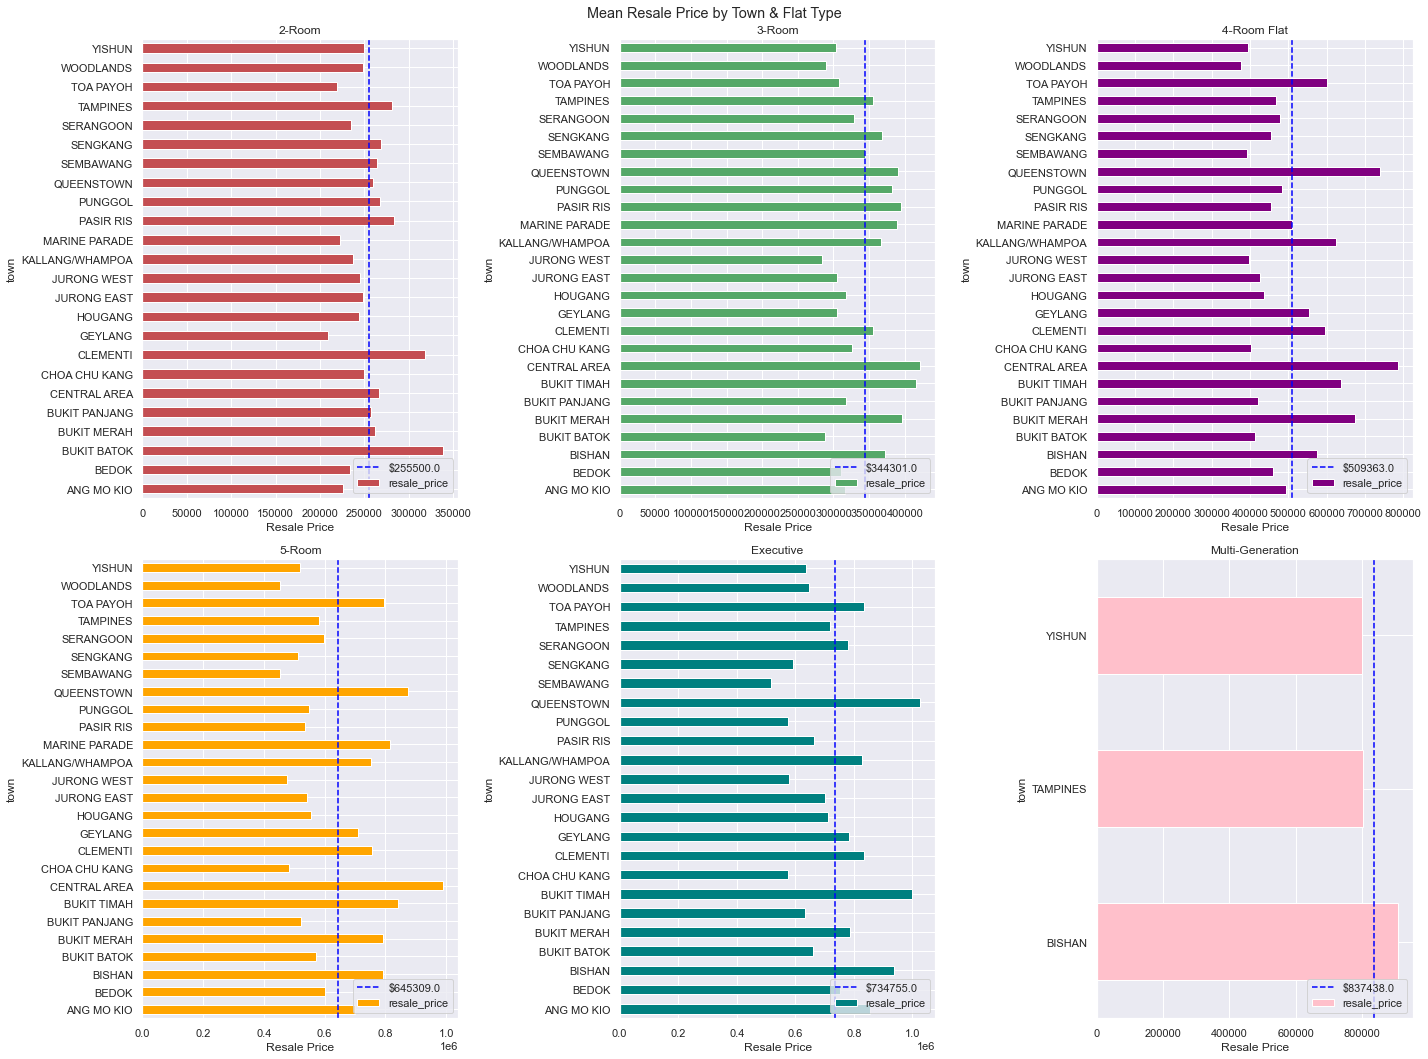

In [23]:
fig3,[[ax0,ax1,ax2],[ax3,ax4,ax5,]] = plt.subplots(nrows = 2, ncols = 3, figsize=(20,15))


mean_two_room = two_room.groupby(by='town').mean()
mean_two_room.reset_index(inplace=True)
mean_two_room.plot(x='town', y='resale_price', kind='barh',color = 'r', ax=ax0)
ax0.set_title('2-Room')
ax0.set_xlabel('Resale Price')
ax0.axvline((mean_two_room['resale_price'].mean()),ls='--',color = 'blue',label=f'${round(mean_two_room["resale_price"].mean(),0)}')
ax0.legend(loc=4)

mean_three_room = three_room.groupby(by='town').mean()
mean_three_room.reset_index(inplace=True)
mean_three_room.plot(x='town', y='resale_price', kind='barh',color = 'g', ax=ax1)
ax1.set_title('3-Room')
ax1.set_xlabel('Resale Price')
ax1.axvline((mean_three_room['resale_price'].mean()),ls='--',color = 'blue',label=f'${round(mean_three_room["resale_price"].mean(),0)}')
ax1.legend(loc=4)

mean_four_room = four_room.groupby(by='town').mean()
mean_four_room.reset_index(inplace=True)
mean_four_room.plot(x='town', y='resale_price', kind='barh',color = 'purple', ax=ax2)
ax2.set_title('4-Room Flat')
ax2.set_xlabel('Resale Price')
ax2.axvline((mean_four_room['resale_price'].mean()),ls='--',color = 'blue',label=f'${round(mean_four_room["resale_price"].mean(),0)}')
ax2.legend(loc=4)

mean_five_room = five_room.groupby(by='town').mean()
mean_five_room.reset_index(inplace=True)
mean_five_room.plot(x='town', y='resale_price', kind='barh',color = 'orange', ax=ax3)
ax3.set_title('5-Room')
ax3.set_xlabel('Resale Price')
ax3.axvline((mean_five_room['resale_price'].mean()),ls='--',color = 'blue',label=f'${round(mean_five_room["resale_price"].mean(),0)}')
ax3.legend(loc=4)

mean_executive = executive.groupby(by='town').mean()
mean_executive.reset_index(inplace=True)
mean_executive.plot(x='town', y='resale_price', kind='barh',color = 'teal', ax=ax4)
ax4.set_title('Executive')
ax4.set_xlabel('Resale Price')
ax4.axvline((mean_executive['resale_price'].mean()),ls='--',color = 'blue',label=f'${round(mean_executive["resale_price"].mean(),0)}')
ax4.legend(loc=4)

mean_multi_generation = multi_generation.groupby(by='town').mean()
mean_multi_generation.reset_index(inplace=True)
mean_multi_generation.plot(x='town', y='resale_price', kind='barh',color = 'pink', ax=ax5)
ax5.set_title('Multi-Generation')
ax5.set_xlabel('Resale Price')
ax5.axvline((mean_multi_generation['resale_price'].mean()),ls='--',color = 'blue',label=f'${round(mean_multi_generation["resale_price"].mean(),0)}')
ax5.legend(loc=4)

fig3.suptitle('Mean Resale Price by Town & Flat Type')
fig3.tight_layout()

#Visualizing mean resale price by town & flat type

In [24]:
mean_two_room

,town,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_in_years,year_bought,price_psm
0,ANG MO KIO,44.230000,1979.930000,225502.760000,59.225000,2019.380000,5098.534949
1,BEDOK,44.970874,1984.912621,233923.621359,64.097087,2019.689320,5195.754075
2,BUKIT BATOK,47.000000,2019.000000,338666.666667,95.361111,2022.000000,7205.673759
3,BUKIT MERAH,45.285714,1977.517857,261463.607143,56.612599,2019.517857,5773.205239
4,BUKIT PANJANG,46.821782,2014.049505,257455.960396,92.967822,2020.336634,5501.031681
5,CENTRAL AREA,52.755556,1976.577778,266703.733333,55.172222,2020.022222,5073.820858
6,CHOA CHU KANG,46.689655,2014.241379,249910.344828,92.797414,2020.189655,5352.760854
7,CLEMENTI,48.361111,2006.388889,318327.111111,85.516204,2019.805556,6554.337798
8,GEYLANG,44.064220,1971.963303,208838.422018,51.238532,2019.266055,4752.122289
9,HOUGANG,47.000000,2012.913043,243486.956522,92.068841,2019.434783,5180.573543


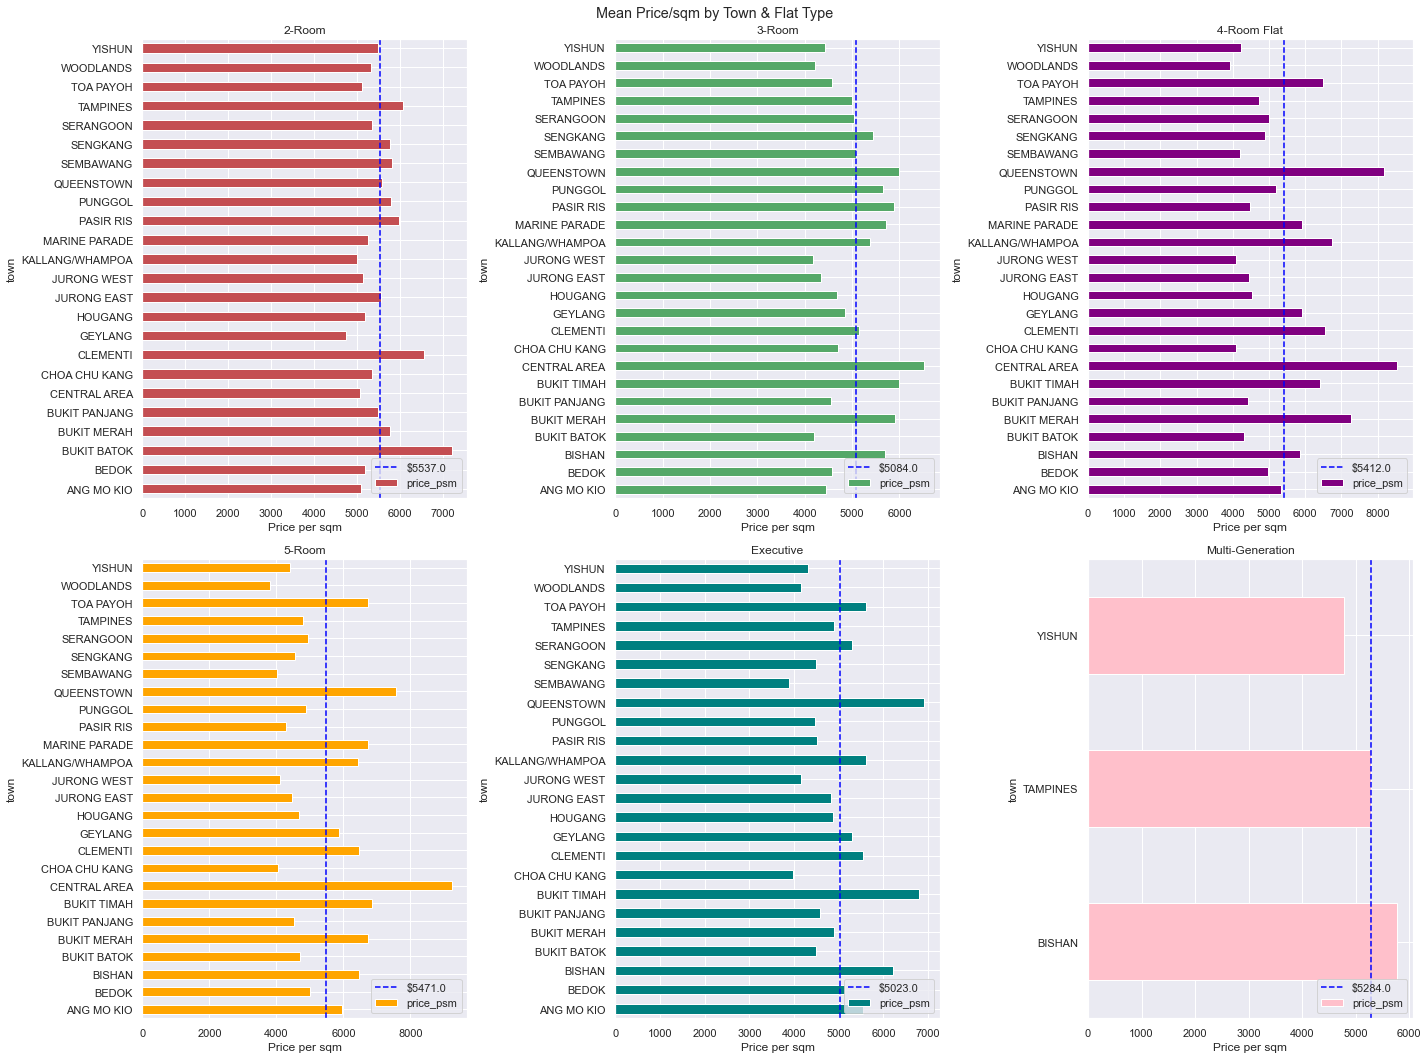

In [25]:
fig4,[[ax0,ax1,ax2],[ax3,ax4,ax5,]] = plt.subplots(nrows = 2, ncols = 3, figsize=(20,15))


mean_two_room = two_room.groupby(by='town').mean()
mean_two_room.reset_index(inplace=True)
mean_two_room.plot(x='town', y='price_psm', kind='barh',color = 'r', ax=ax0)
ax0.set_title('2-Room')
ax0.set_xlabel('Price per sqm')
ax0.axvline((mean_two_room['price_psm'].mean()),ls='--',color = 'blue',label=f'${round(mean_two_room["price_psm"].mean(),0)}')
ax0.legend(loc=4)

mean_three_room = three_room.groupby(by='town').mean()
mean_three_room.reset_index(inplace=True)
mean_three_room.plot(x='town', y='price_psm', kind='barh',color = 'g', ax=ax1)
ax1.set_title('3-Room')
ax1.set_xlabel('Price per sqm')
ax1.axvline((mean_three_room['price_psm'].mean()),ls='--',color = 'blue',label=f'${round(mean_three_room["price_psm"].mean(),0)}')
ax1.legend(loc=4)

mean_four_room = four_room.groupby(by='town').mean()
mean_four_room.reset_index(inplace=True)
mean_four_room.plot(x='town', y='price_psm', kind='barh',color = 'purple', ax=ax2)
ax2.set_title('4-Room Flat')
ax2.set_xlabel('Price per sqm')
ax2.axvline((mean_four_room['price_psm'].mean()),ls='--',color = 'blue',label=f'${round(mean_four_room["price_psm"].mean(),0)}')
ax2.legend(loc=4)

mean_five_room = five_room.groupby(by='town').mean()
mean_five_room.reset_index(inplace=True)
mean_five_room.plot(x='town', y='price_psm', kind='barh',color = 'orange', ax=ax3)
ax3.set_title('5-Room')
ax3.set_xlabel('Price per sqm')
ax3.axvline((mean_five_room['price_psm'].mean()),ls='--',color = 'blue',label=f'${round(mean_five_room["price_psm"].mean(),0)}')
ax3.legend(loc=4)

mean_executive = executive.groupby(by='town').mean()
mean_executive.reset_index(inplace=True)
mean_executive.plot(x='town', y='price_psm', kind='barh',color = 'teal', ax=ax4)
ax4.set_title('Executive')
ax4.set_xlabel('Price per sqm')
ax4.axvline((mean_executive['price_psm'].mean()),ls='--',color = 'blue',label=f'${round(mean_executive["price_psm"].mean(),0)}')
ax4.legend(loc=4)

mean_multi_generation = multi_generation.groupby(by='town').mean()
mean_multi_generation.reset_index(inplace=True)
mean_multi_generation.plot(x='town', y='price_psm', kind='barh',color = 'pink', ax=ax5)
ax5.set_title('Multi-Generation')
ax5.set_xlabel('Price per sqm')
ax5.axvline((mean_multi_generation['price_psm'].mean()),ls='--',color = 'blue',label=f'${round(mean_multi_generation["price_psm"].mean(),0)}')
ax5.legend(loc=4)

fig4.suptitle('Mean Price/sqm by Town & Flat Type')
fig4.tight_layout()


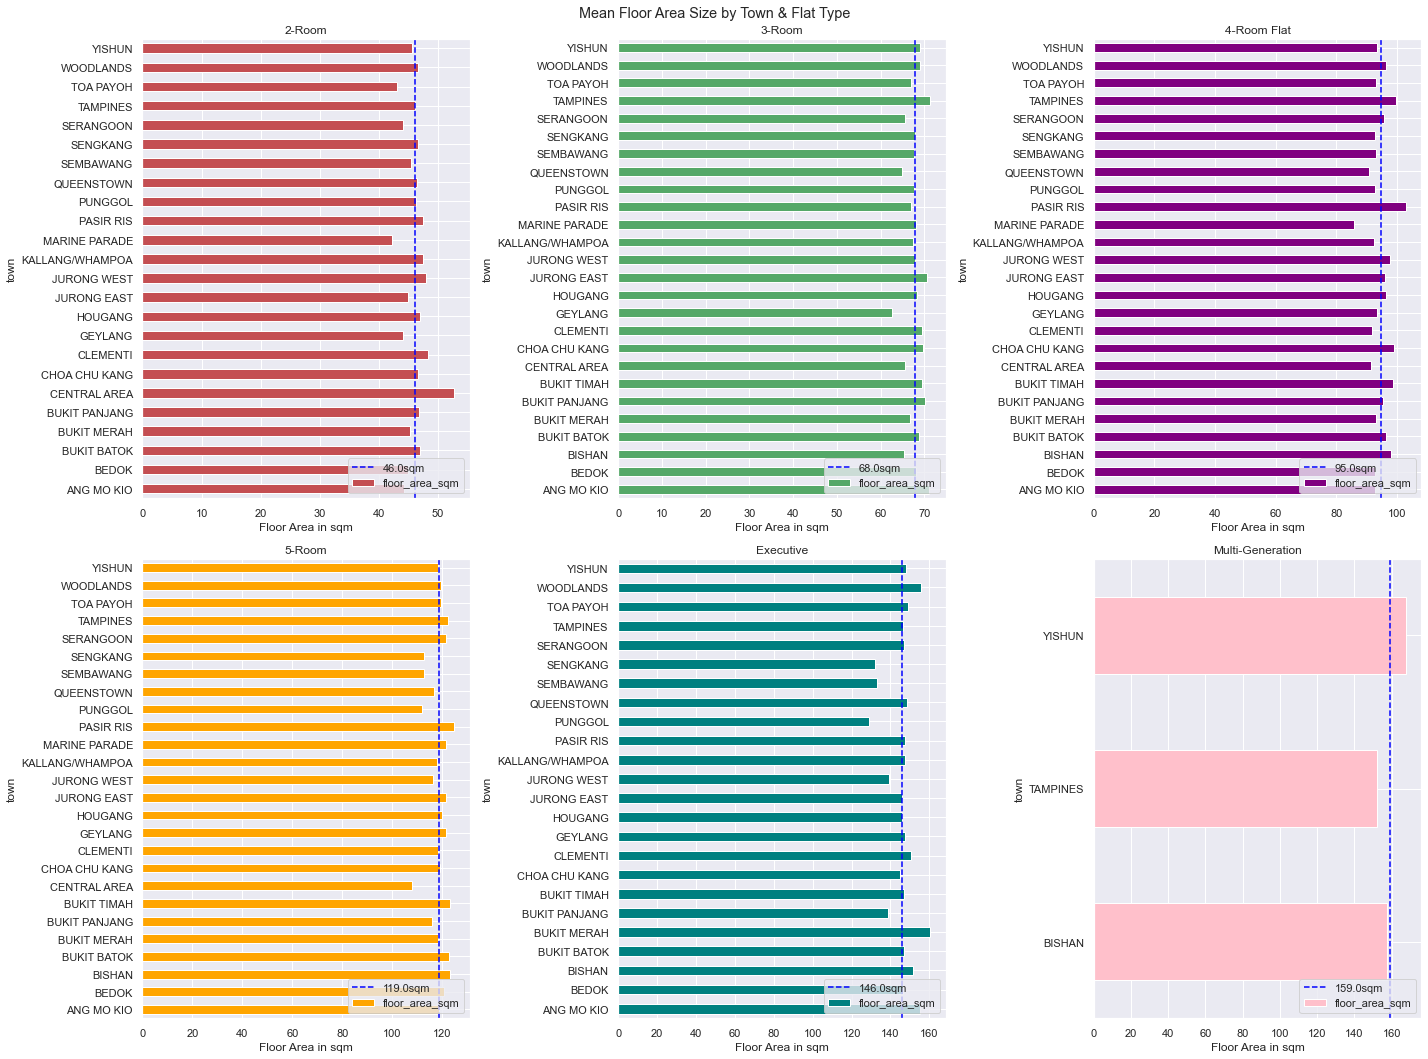

In [26]:
fig5,[[ax0,ax1,ax2],[ax3,ax4,ax5,]] = plt.subplots(nrows = 2, ncols = 3, figsize=(20,15))


mean_two_room = two_room.groupby(by='town').mean()
mean_two_room.reset_index(inplace=True)
mean_two_room.plot(x='town', y='floor_area_sqm', kind='barh',color = 'r', ax=ax0)
ax0.set_title('2-Room')
ax0.set_xlabel('Floor Area in sqm')
ax0.axvline((mean_two_room['floor_area_sqm'].mean()),ls='--',color = 'blue',label=f'{round(mean_two_room["floor_area_sqm"].mean(),0)}sqm')
ax0.legend(loc=4)

mean_three_room = three_room.groupby(by='town').mean()
mean_three_room.reset_index(inplace=True)
mean_three_room.plot(x='town', y='floor_area_sqm', kind='barh',color = 'g', ax=ax1)
ax1.set_title('3-Room')
ax1.set_xlabel('Floor Area in sqm')
ax1.axvline((mean_three_room['floor_area_sqm'].mean()),ls='--',color = 'blue',label=f'{round(mean_three_room["floor_area_sqm"].mean(),0)}sqm')
ax1.legend(loc=4)

mean_four_room = four_room.groupby(by='town').mean()
mean_four_room.reset_index(inplace=True)
mean_four_room.plot(x='town', y='floor_area_sqm', kind='barh',color = 'purple', ax=ax2)
ax2.set_title('4-Room Flat')
ax2.set_xlabel('Floor Area in sqm')
ax2.axvline((mean_four_room['floor_area_sqm'].mean()),ls='--',color = 'blue',label=f'{round(mean_four_room["floor_area_sqm"].mean(),0)}sqm')
ax2.legend(loc=4)

mean_five_room = five_room.groupby(by='town').mean()
mean_five_room.reset_index(inplace=True)
mean_five_room.plot(x='town', y='floor_area_sqm', kind='barh',color = 'orange', ax=ax3)
ax3.set_title('5-Room')
ax3.set_xlabel('Floor Area in sqm')
ax3.axvline((mean_five_room['floor_area_sqm'].mean()),ls='--',color = 'blue',label=f'{round(mean_five_room["floor_area_sqm"].mean(),0)}sqm')
ax3.legend(loc=4)

mean_executive = executive.groupby(by='town').mean()
mean_executive.reset_index(inplace=True)
mean_executive.plot(x='town', y='floor_area_sqm', kind='barh',color = 'teal', ax=ax4)
ax4.set_title('Executive')
ax4.set_xlabel('Floor Area in sqm')
ax4.axvline((mean_executive['floor_area_sqm'].mean()),ls='--',color = 'blue',label=f'{round(mean_executive["floor_area_sqm"].mean(),0)}sqm')
ax4.legend(loc=4)

mean_multi_generation = multi_generation.groupby(by='town').mean()
mean_multi_generation.reset_index(inplace=True)
mean_multi_generation.plot(x='town', y='floor_area_sqm', kind='barh',color = 'pink', ax=ax5)
ax5.set_title('Multi-Generation')
ax5.set_xlabel('Floor Area in sqm')
ax5.axvline((mean_multi_generation['floor_area_sqm'].mean()),ls='--',color = 'blue',label=f'{round(mean_multi_generation["floor_area_sqm"].mean(),0)}sqm')
ax5.legend(loc=4)

fig5.suptitle('Mean Floor Area Size by Town & Flat Type')
fig5.tight_layout()

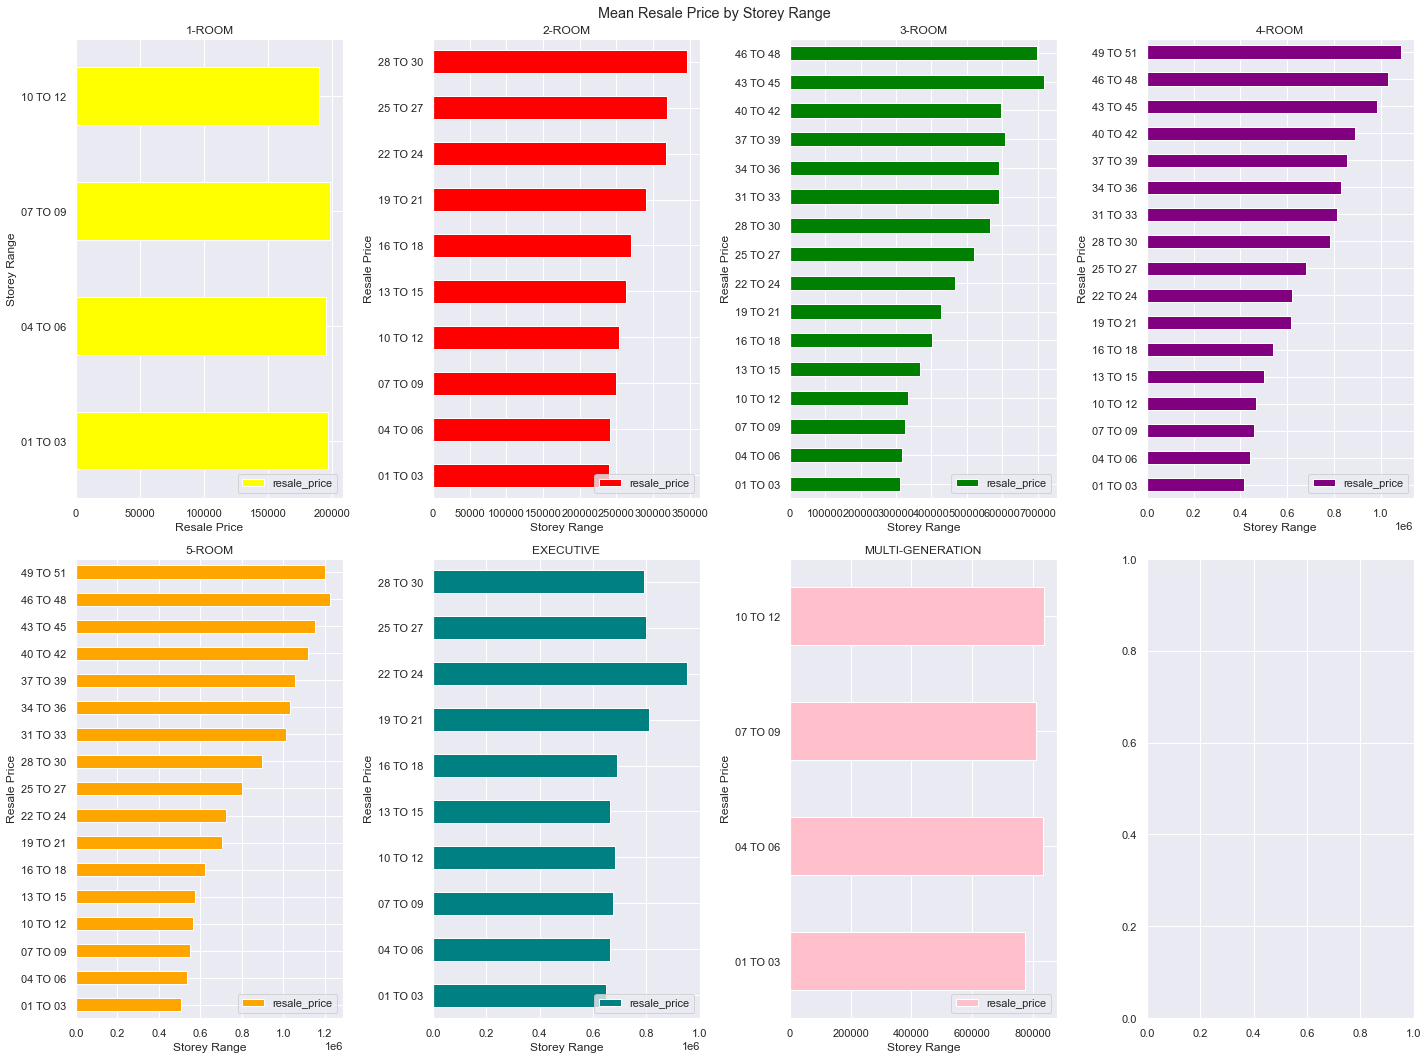

In [27]:
fig6,[[ax0,ax1,ax2,ax3],[ax4,ax5,ax6,ax7]] = plt.subplots(nrows = 2, ncols =4, figsize=(20,15))

one_room_sortbystorey = one_room.groupby('storey_range').mean()
one_room_sortbystorey.reset_index(inplace=True)
one_room_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='yellow',ax=ax0)
ax0.set_xlabel('Resale Price')
ax0.set_ylabel('Storey Range')
ax0.set_title('1-ROOM')
ax0.legend(loc=4)


two_room_sortbystorey = two_room.groupby('storey_range').mean()
two_room_sortbystorey.reset_index(inplace=True)
two_room_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='red',ax=ax1)
ax1.set_xlabel('Storey Range')
ax1.set_ylabel('Resale Price')
ax1.set_title('2-ROOM')
ax1.legend(loc=4)

three_room_sortbystorey = three_room.groupby('storey_range').mean()
three_room_sortbystorey.reset_index(inplace=True)
three_room_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='green',ax=ax2)
ax2.set_xlabel('Storey Range')
ax2.set_ylabel('Resale Price')
ax2.set_title('3-ROOM')
ax2.legend(loc=4)

four_room_sortbystorey = four_room.groupby('storey_range').mean()
four_room_sortbystorey.reset_index(inplace=True)
four_room_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='purple',ax=ax3)
ax3.set_xlabel('Storey Range')
ax3.set_ylabel('Resale Price')
ax3.set_title('4-ROOM')
ax3.legend(loc=4)

five_room_sortbystorey = five_room.groupby('storey_range').mean()
five_room_sortbystorey.reset_index(inplace=True)
five_room_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='orange',ax=ax4)
ax4.set_xlabel('Storey Range')
ax4.set_ylabel('Resale Price')
ax4.set_title('5-ROOM')
ax4.legend(loc=4)


executive_sortbystorey = executive.groupby('storey_range').mean()
executive_sortbystorey.reset_index(inplace=True)
executive_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='teal',ax=ax5)
ax5.set_xlabel('Storey Range')
ax5.set_ylabel('Resale Price')
ax5.set_title('EXECUTIVE')
ax5.legend(loc=4)

multi_generation_sortbystorey = multi_generation.groupby('storey_range').mean()
multi_generation_sortbystorey.reset_index(inplace=True)
multi_generation_sortbystorey.plot(x='storey_range',y='resale_price',kind='barh',color='pink',ax=ax6)
ax6.set_xlabel('Storey Range')
ax6.set_ylabel('Resale Price')
ax6.set_title('MULTI-GENERATION')
ax6.legend(loc=4)

fig6.suptitle('Mean Resale Price by Storey Range')
fig6.tight_layout()

#Visualizing price trends by storey range. Generally, the higher the HDB block one goes, one can expect the resale price of a flat to go up.

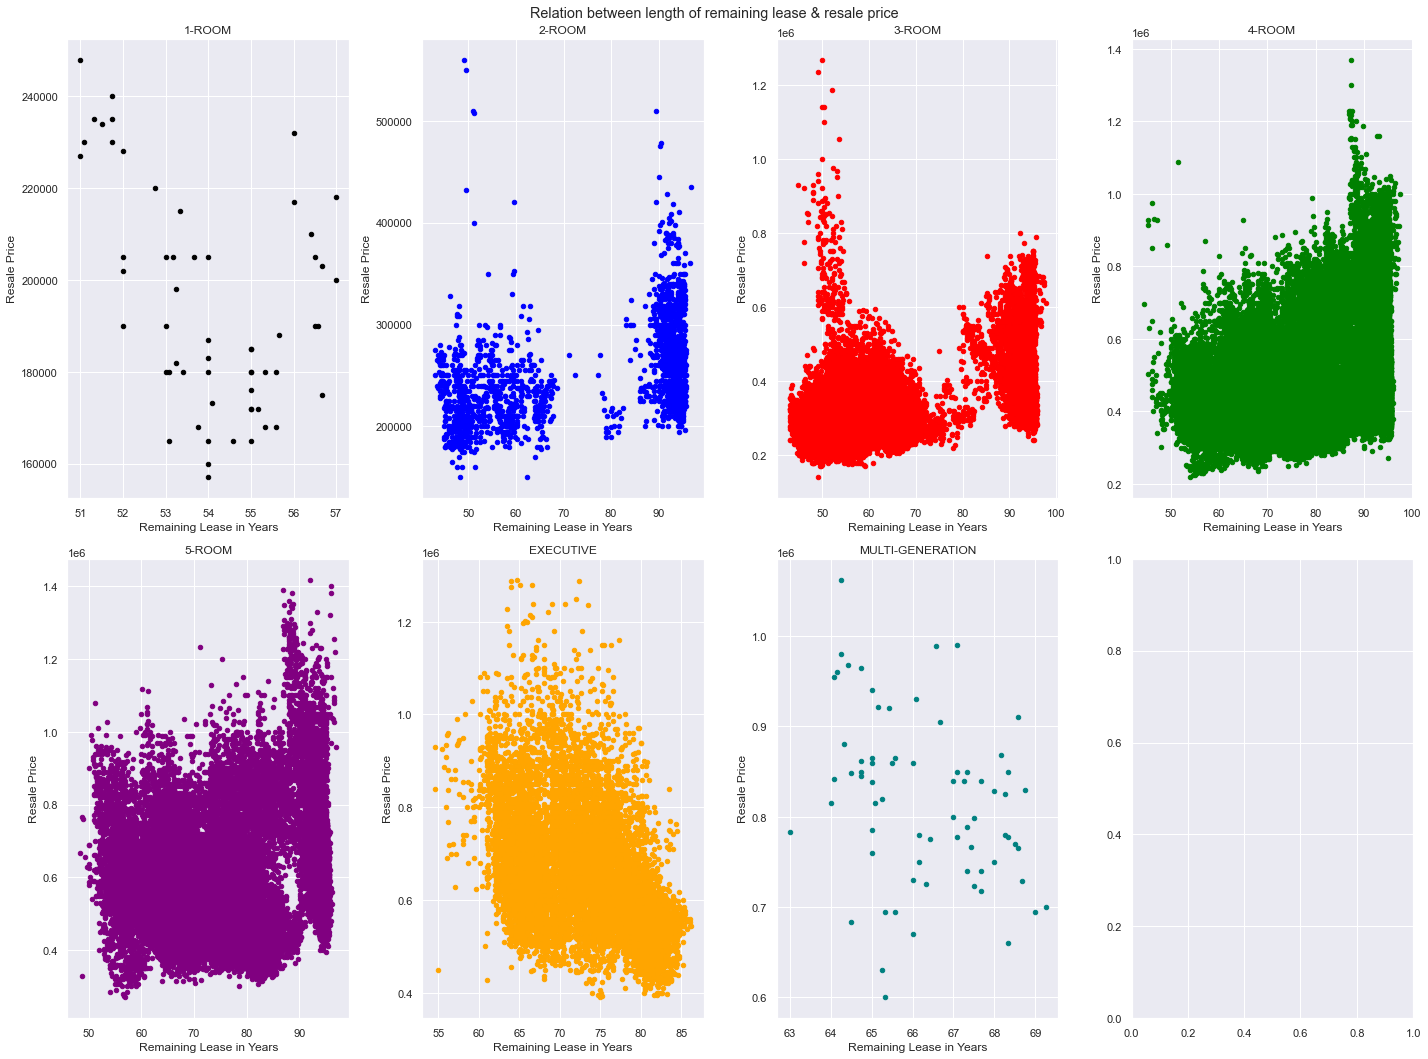

In [28]:
fig7,[[ax0,ax1,ax2,ax3],[ax4,ax5,ax6,ax7]] = plt.subplots(nrows = 2, ncols =4, figsize=(20,15))

one_room.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='black',ax=ax0)
ax0.set_xlabel('Remaining Lease in Years')
ax0.set_ylabel('Resale Price')
ax0.set_title('1-ROOM')

two_room.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='blue',ax=ax1)
ax1.set_xlabel('Remaining Lease in Years')
ax1.set_ylabel('Resale Price')
ax1.set_title('2-ROOM')

three_room.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='red',ax=ax2)
ax2.set_xlabel('Remaining Lease in Years')
ax2.set_ylabel('Resale Price')
ax2.set_title('3-ROOM')

four_room.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='green',ax=ax3)
ax3.set_xlabel('Remaining Lease in Years')
ax3.set_ylabel('Resale Price')
ax3.set_title('4-ROOM')

five_room.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='purple',ax=ax4)
ax4.set_xlabel('Remaining Lease in Years')
ax4.set_ylabel('Resale Price')
ax4.set_title('5-ROOM')

executive.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='orange',ax=ax5)
ax5.set_xlabel('Remaining Lease in Years')
ax5.set_ylabel('Resale Price')
ax5.set_title('EXECUTIVE')

multi_generation.plot(x='remaining_lease_in_years',y='resale_price',kind='scatter', color='teal',ax=ax6)
ax6.set_xlabel('Remaining Lease in Years')
ax6.set_ylabel('Resale Price')
ax6.set_title('MULTI-GENERATION')

fig7.suptitle('Relation between length of remaining lease & resale price')
fig7.tight_layout()



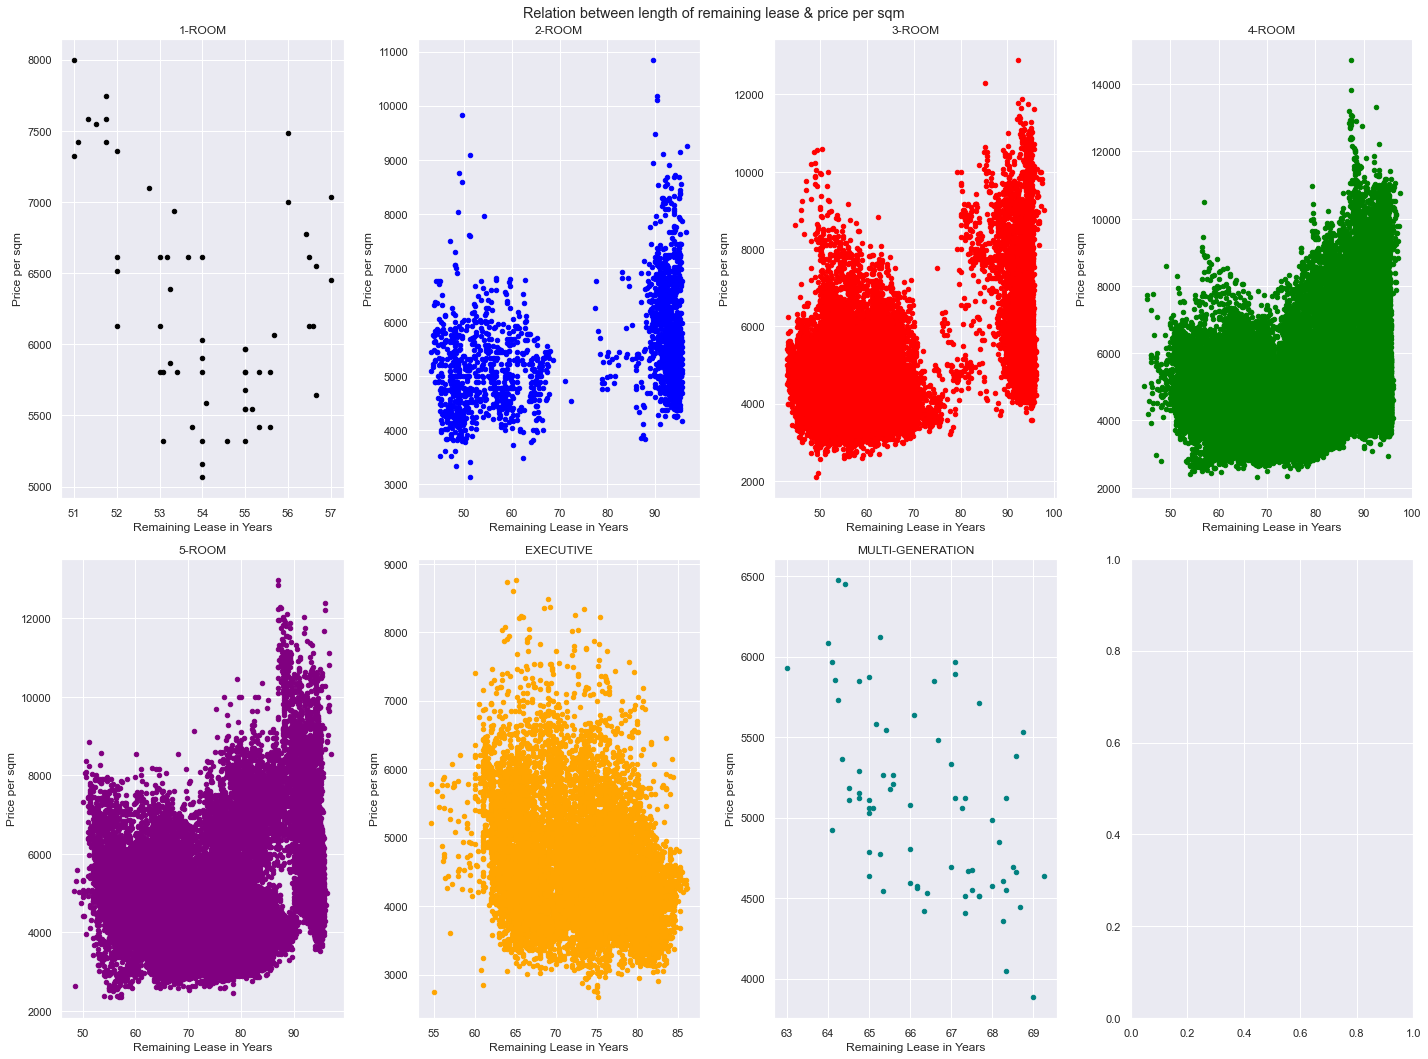

In [29]:
fig8,[[ax0,ax1,ax2,ax3],[ax4,ax5,ax6,ax7]] = plt.subplots(nrows = 2, ncols =4, figsize=(20,15))

one_room.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='black',ax=ax0)
ax0.set_xlabel('Remaining Lease in Years')
ax0.set_ylabel('Price per sqm')
ax0.set_title('1-ROOM')

two_room.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='blue',ax=ax1)
ax1.set_xlabel('Remaining Lease in Years')
ax1.set_ylabel('Price per sqm')
ax1.set_title('2-ROOM')

three_room.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='red',ax=ax2)
ax2.set_xlabel('Remaining Lease in Years')
ax2.set_ylabel('Price per sqm')
ax2.set_title('3-ROOM')

four_room.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='green',ax=ax3)
ax3.set_xlabel('Remaining Lease in Years')
ax3.set_ylabel('Price per sqm')
ax3.set_title('4-ROOM')

five_room.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='purple',ax=ax4)
ax4.set_xlabel('Remaining Lease in Years')
ax4.set_ylabel('Price per sqm')
ax4.set_title('5-ROOM')

executive.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='orange',ax=ax5)
ax5.set_xlabel('Remaining Lease in Years')
ax5.set_ylabel('Price per sqm')
ax5.set_title('EXECUTIVE')

multi_generation.plot(x='remaining_lease_in_years',y='price_psm',kind='scatter', color='teal',ax=ax6)
ax6.set_xlabel('Remaining Lease in Years')
ax6.set_ylabel('Price per sqm')
ax6.set_title('MULTI-GENERATION')

fig8.suptitle('Relation between length of remaining lease & price per sqm')
fig8.tight_layout()


## 4. Machine Learning Models

**Encoding any categorical column that will be used for machine learning later**

In [30]:
df_hdb.dtypes

month                       datetime64[ns]
town                                object
flat_type                           object
block                               object
street_name                         object
storey_range                        object
floor_area_sqm                     float64
flat_model                          object
lease_commence_date                  int64
remaining_lease                     object
resale_price                       float64
remaining_lease_in_years           float64
year_bought                          int64
price_psm                          float64
region                              object
dtype: object

In [31]:
print(df_hdb['flat_type'].value_counts())
print(df_hdb['storey_range'].value_counts())
print(df_hdb['region'].value_counts())
print(df_hdb['town'].value_counts())

4 ROOM              59348
5 ROOM              36151
3 ROOM              33307
EXECUTIVE           11112
2 ROOM               2152
MULTI-GENERATION       71
1 ROOM                 58
Name: flat_type, dtype: int64
04 TO 06    32762
07 TO 09    29731
10 TO 12    26487
01 TO 03    25194
13 TO 15    13623
16 TO 18     6417
19 TO 21     2734
22 TO 24     1985
25 TO 27     1166
28 TO 30      744
31 TO 33      397
34 TO 36      371
37 TO 39      335
40 TO 42      163
43 TO 45       44
46 TO 48       33
49 TO 51       13
Name: storey_range, dtype: int64
North East    38081
West          32412
Central       27141
North         22921
East          21644
Name: region, dtype: int64
SENGKANG           12075
PUNGGOL            10414
WOODLANDS           9787
YISHUN              9677
TAMPINES            9544
JURONG WEST         9459
BEDOK               7684
HOUGANG             6964
CHOA CHU KANG       6508
ANG MO KIO          5951
BUKIT PANJANG       5497
BUKIT MERAH         5483
BUKIT BATOK         47

In [32]:
#converting the categorical columns -> flat_types , storey_range, region
df_hdb.replace({'flat_type':{'1 ROOM':0,'2 ROOM':1,'3 ROOM':2, '4 ROOM':3, '5 ROOM':4, 'EXECUTIVE':5,'MULTI-GENERATION':6}}, inplace=True)


df_hdb.replace({'storey_range':{'01 TO 03':0, '04 TO 06':1, '07 TO 09':2, '10 TO 12':3, '13 TO 15':4, '16 TO 18':5, '19 TO 21':6, '22 TO 24':7, '25 TO 27':8, '28 TO 30':9, '31 TO 33':10, 
                '34 TO 36':11, '37 TO 39':12, '40 TO 42':13, '43 TO 45':14,'46 TO 48':15,'49 TO 51':16}}, inplace=True)

df_hdb.replace({'region':{'West':0,'North':1,'North East':2, 'East':3, 'Central':4}}, inplace=True)

df_hdb.replace({'town':{'ANG MO KIO':0, 'BEDOK':1, 'BISHAN':2, 'BUKIT BATOK':3, 'BUKIT MERAH':4, 'BUKIT PANJANG':5, 'BUKIT TIMAH':6, 'CENTRAL AREA':7, 'CHOA CHU KANG':8, 'CLEMENTI':9, 'GEYLANG':10, 
                'HOUGANG':11, 'JURONG EAST':12, 'JURONG WEST':13, 'KALLANG/WHAMPOA':14,'MARINE PARADE':15,'PASIR RIS':16,'PUNGGOL':17,'QUEENSTOWN':18,'SEMBAWANG':19,'SENGKANG':20,'SERANGOON':21,'TAMPINES':22,'TOA PAYOH':23,'WOODLANDS':24,'YISHUN':25}}, inplace=True)

In [33]:
print(df_hdb['town'].value_counts())

20    12075
17    10414
24     9787
25     9677
22     9544
13     9459
1      7684
11     6964
8      6508
0      5951
5      5497
4      5483
3      4729
23     4594
16     4416
14     4265
18     4071
10     3519
19     3457
9      3242
12     2977
2      2735
21     2677
7      1182
15      913
6       379
Name: town, dtype: int64


In [34]:
df_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_years,year_bought,price_psm,region
0,2017-01-01,0,1,406,ANG MO KIO AVE 10,3,44.0,Improved,1979,61 years 04 months,232000.0,61.333333,2017,5272.727273,2
1,2017-01-01,0,2,108,ANG MO KIO AVE 4,0,67.0,New Generation,1978,60 years 07 months,250000.0,60.583333,2017,3731.343284,2
2,2017-01-01,0,2,602,ANG MO KIO AVE 5,0,67.0,New Generation,1980,62 years 05 months,262000.0,62.416667,2017,3910.447761,2
3,2017-01-01,0,2,465,ANG MO KIO AVE 10,1,68.0,New Generation,1980,62 years 01 month,265000.0,62.000000,2017,3897.058824,2
4,2017-01-01,0,2,601,ANG MO KIO AVE 5,0,67.0,New Generation,1980,62 years 05 months,265000.0,62.416667,2017,3955.223881,2


**Separating the features and the target**

In [35]:
X = df_hdb.drop(columns = ['month', 'block','street_name','flat_model','lease_commence_date','remaining_lease','resale_price','year_bought','price_psm','region'],axis=1)
Y = df_hdb['resale_price']

print (X)
print (Y)

        town  flat_type  storey_range  floor_area_sqm  \
0          0          1             3            44.0   
1          0          2             0            67.0   
2          0          2             0            67.0   
3          0          2             1            68.0   
4          0          2             0            67.0   
...      ...        ...           ...             ...   
142194    25          6             1           171.0   
142195    25          6             3           164.0   
142196    25          6             1           163.0   
142197    25          6             3           164.0   
142198    25          6             2           171.0   

        remaining_lease_in_years  
0                      61.333333  
1                      60.583333  
2                      62.416667  
3                      62.000000  
4                      62.416667  
...                          ...  
142194                 64.083333  
142195                 64.750000  


**Splitting the data into training & testing data**

In [36]:
X_train, X_test, Y_train,Y_test =  train_test_split(X,Y, test_size=0.2, random_state=123)

In [37]:
Y_test.shape


(28440,)

### Model Training/Testing

**Linear Regression Model Training (base model)**

In [38]:
from sklearn.linear_model import LinearRegression
model_linearregression =  LinearRegression()
model_linearregression.fit(X_train, Y_train)

LinearRegression()

In [137]:
print(model_linearregression.intercept_)
print(model_linearregression.coef_)

3617.052037403003
[-26.20241427 282.23052987 268.21483048 -17.73647128  25.45793933]


**Linear Regression Model Testing**

In [40]:
linear_regression_pred = model_linearregression.predict(X_test)
actual_vs_pred_LR = pd.DataFrame({'Actual': Y_test, 'Predicted': linear_regression_pred})
actual_vs_pred_LR

,Actual,Predicted
39086,388000.0,406245.692276
53385,365000.0,586046.747787
31092,380000.0,569062.923338
29076,285000.0,347764.313277
124053,740000.0,545596.813515
...,...,...
21030,440000.0,401283.746895
134878,532000.0,556403.634027
80652,398000.0,506273.596052
83479,520000.0,496616.893785


**Linear Regression Model Evaluation**

In [41]:
from sklearn import metrics

RMSE_linear_regression = np.sqrt(metrics.mean_squared_error(Y_test, linear_regression_pred))
RMSE_linear_regression

#measures the average difference between values predicted by a model and the actual values
#for every prediction, an RMSE(Root Mean Squared Error) of 26755 is present. 

109925.7698345888

In [42]:
mean_price = df_hdb['resale_price'].mean()
mean_price

475763.3865690334

In [43]:
print(f'Percentage Error for Linear Regression Model is {RMSE_linear_regression/mean_price*100}%')
#RMSE metric evaluation for base Linear Regression

Percentage Error for Linear Regression Model is 23.105134387771674%


In [44]:
# R2 score
r2_linear_regression = metrics.r2_score(Y_test , linear_regression_pred)
r2_linear_regression

0.5551159981307183

**Lasso Regression Training, Testing & Evaluation**

In [149]:
from sklearn.linear_model import Lasso
model_Lasso = Lasso(alpha= 0.8)
model_Lasso.fit(X_train,Y_train)

#An alpha value of zero in either ridge or lasso model will have results similar to the regression model. The larger the alpha value, the more aggressive the penalization.

Lasso(alpha=0.8)

In [150]:
lasso_pred = model_Lasso.predict(X_test)
actual_vs_pred_Lasso = pd.DataFrame({'Actual': Y_test, 'Predicted': lasso_pred})
actual_vs_pred_Lasso

,Actual,Predicted
39086,388000.0,406250.726097
53385,365000.0,586044.436647
31092,380000.0,569061.348458
29076,285000.0,347764.136764
124053,740000.0,545596.659834
...,...,...
21030,440000.0,401284.547035
134878,532000.0,556407.290022
80652,398000.0,506273.817395
83479,520000.0,496613.349383


In [151]:
RMSE_Lasso = np.sqrt(metrics.mean_squared_error(Y_test, lasso_pred))
RMSE_Lasso

109925.79019159188

In [152]:
# R2 score
r2_lasso = metrics.r2_score(Y_test , lasso_pred)
r2_lasso

0.5551158333557825

**Ridge Regression Model Training, Testing & Evaluation**

In [49]:
from sklearn.linear_model import Ridge 
model_Ridge = Ridge(alpha= 0.3)
model_Ridge.fit(X_train,Y_train)

Ridge(alpha=0.3)

In [50]:
ridge_pred = model_Ridge.predict(X_test)
actual_vs_pred_Ridge = pd.DataFrame({'Actual': Y_test, 'Predicted': ridge_pred})
actual_vs_pred_Ridge

,Actual,Predicted
39086,388000.0,406245.048015
53385,365000.0,586047.037927
31092,380000.0,569063.109400
29076,285000.0,347764.297349
124053,740000.0,545596.716006
...,...,...
21030,440000.0,401283.687574
134878,532000.0,556403.152054
80652,398000.0,506273.530534
83479,520000.0,496617.285321


In [51]:
RMSE_Ridge = np.sqrt(metrics.mean_squared_error(Y_test, ridge_pred))
RMSE_Ridge

109925.76774530383

In [52]:
# R2 score
r2_ridge = metrics.r2_score(Y_test , ridge_pred)
r2_ridge

0.5551160150419385

**ElasticNet Training, Testing & Evaluation**

In [53]:
from sklearn.linear_model import ElasticNet 
model_ElasticNet = ElasticNet(alpha=0.3, l1_ratio=0.8)
model_ElasticNet.fit(X_train,Y_train)

ElasticNet(alpha=0.3, l1_ratio=0.8)

In [54]:
Elastic_pred = model_ElasticNet.predict(X_test)
actual_vs_pred_Elastic = pd.DataFrame({'Actual': Y_test, 'Predicted': Elastic_pred})
actual_vs_pred_Elastic

,Actual,Predicted
39086,388000.0,398061.824754
53385,365000.0,589722.943335
31092,380000.0,571360.482951
29076,285000.0,347370.588903
124053,740000.0,543914.438188
...,...,...
21030,440000.0,400670.859893
134878,532000.0,550190.598541
80652,398000.0,505366.071431
83479,520000.0,501339.374549


In [55]:
RMSE_elastic = np.sqrt(metrics.mean_squared_error(Y_test, Elastic_pred))
RMSE_elastic

109991.1344265241

In [154]:
print(f'Percentage Error for Linear Regression Model is {RMSE_elastic/mean_price*100}%')

Percentage Error for Linear Regression Model is 23.118873274323384%


In [56]:
# R2 score
r2_elastic = metrics.r2_score(Y_test , Elastic_pred)
r2_elastic

0.5545867626834019

**Random Forest Training, Testing & Evaluation**

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
basemodel_randomforest = RandomForestRegressor(n_estimators = 100, max_depth = 5,max_features = 1.0,random_state=123)
basemodel_randomforest.fit(X_train,Y_train)



RandomForestRegressor(max_depth=5, max_features=4, random_state=123)

In [58]:
base_rf_pred = basemodel_randomforest.predict(X_test)

In [59]:
actual_vs_pred_base_rf = pd.DataFrame({'Actual': Y_test, 'Predicted': base_rf_pred})
actual_vs_pred_base_rf


,Actual,Predicted
39086,388000.0,407707.408853
53385,365000.0,537707.806317
31092,380000.0,537707.806317
29076,285000.0,302927.568369
124053,740000.0,450905.139115
...,...,...
21030,440000.0,445497.383632
134878,532000.0,474200.896126
80652,398000.0,448523.093969
83479,520000.0,448523.093969


In [60]:
RMSE_base_rf = np.sqrt(metrics.mean_squared_error(Y_test, base_rf_pred))
RMSE_base_rf

99485.7015015533

In [61]:
print(f'Percentage Error for Linear Regression Model is {RMSE_base_rf/mean_price*100}%')
#RMSE metric evaluation for base Random Forest

Percentage Error for Linear Regression Model is 20.910751922083413%


In [62]:
r2_base_rf = metrics.r2_score(Y_test , base_rf_pred)
r2_base_rf

0.6356077846345791

In [63]:
param_dict = {'n_estimators':[10,50,100,150],'max_depth':[2,4,6,8],'max_features': ['auto','log2','sqrt'],'bootstrap':[True, False]}
param_dict

{'n_estimators': [10, 50, 100, 150],
 'max_depth': [2, 4, 6, 8],
 'max_features': ['auto', 'log2', 'sqrt'],
 'bootstrap': [True, False]}

In [64]:
base_rf = RandomForestRegressor(random_state=123)

In [65]:
tunedmodel_randomforest = RandomizedSearchCV(estimator= base_rf, param_distributions = param_dict , cv=5 , n_jobs = -1, verbose= 2)  
tunedmodel_randomforest.fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'n_estimators': [10, 50, 100, 150]},
                   verbose=2)

In [66]:
tunedmodel_randomforest.best_params_

{'n_estimators': 150,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [67]:
tuned_rf_pred = tunedmodel_randomforest.predict(X_test)
actual_vs_pred_tuned_rf = pd.DataFrame({'Actual': Y_test, 'Predicted': tuned_rf_pred})
actual_vs_pred_tuned_rf

,Actual,Predicted
39086,388000.0,442314.944302
53385,365000.0,533289.269502
31092,380000.0,533289.269502
29076,285000.0,294244.183826
124053,740000.0,429295.022936
...,...,...
21030,440000.0,447466.901066
134878,532000.0,465833.586525
80652,398000.0,542885.124041
83479,520000.0,428445.102044


In [68]:
RMSE_tuned_rf = np.sqrt(metrics.mean_squared_error(Y_test, tuned_rf_pred))
RMSE_tuned_rf
#RMSE metric evaluation for tuned Random Forest model

84562.41505917851

In [69]:
print(f'Percentage Error for tuned Random Forest Model is {RMSE_tuned_rf/mean_price*100}%')


Percentage Error for tuned Random Forest Model is 17.774048496879967%


In [70]:
r2_tuned_rf = metrics.r2_score(Y_test , tuned_rf_pred)
r2_tuned_rf

0.7367293094477236

**Trying a different set of hyperparameters for Random Forest**

In [71]:
param_dict2 = {'n_estimators':[20,70,120,200],'max_depth':[3,5,7,9],'max_features': ['auto','log2','sqrt'],'bootstrap':[True, False]}
param_dict2

{'n_estimators': [20, 70, 120, 200],
 'max_depth': [3, 5, 7, 9],
 'max_features': ['auto', 'log2', 'sqrt'],
 'bootstrap': [True, False]}

In [72]:
tunedmodel_randomforest2 = RandomizedSearchCV(estimator= base_rf, param_distributions = param_dict2 , cv=5 , n_jobs = -1, verbose= 2)  
tunedmodel_randomforest2.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'n_estimators': [20, 70, 120, 200]},
                   verbose=2)

In [73]:
tuned_rf_pred2 = tunedmodel_randomforest2.predict(X_test)
actual_vs_pred_tuned_rf2 = pd.DataFrame({'Actual': Y_test, 'Predicted': tuned_rf_pred2})
actual_vs_pred_tuned_rf2

,Actual,Predicted
39086,388000.0,447180.075997
53385,365000.0,527882.759399
31092,380000.0,527882.759399
29076,285000.0,280428.672339
124053,740000.0,416942.643784
...,...,...
21030,440000.0,464386.585033
134878,532000.0,458335.815296
80652,398000.0,447149.114524
83479,520000.0,416394.103262


In [74]:
RMSE_tuned_rf2 = np.sqrt(metrics.mean_squared_error(Y_test, tuned_rf_pred2))
RMSE_tuned_rf2

79386.49987740911

In [75]:
print(f'Percentage Error for tuned Random Forest Model 2 is {RMSE_tuned_rf2/mean_price*100}%')

Percentage Error for tuned Random Forest Model 2 is 16.686130567949895%


In [76]:
r2_tuned_rf2 = metrics.r2_score(Y_test , tuned_rf_pred2)
r2_tuned_rf2
#Tuned RF model 2 performs much better

0.7679716422842251

**SVM (SVR) Model Training, Testing & Evaluation**

In [77]:
from sklearn.svm import LinearSVR
svr_model = LinearSVR()
svr_model.fit(X_train,Y_train)

LinearSVR()

In [78]:
svr_pred = svr_model.predict(X_test)
actual_vs_pred_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': svr_pred})
actual_vs_pred_svr

,Actual,Predicted
39086,388000.0,390320.495654
53385,365000.0,562151.924471
31092,380000.0,551534.574481
29076,285000.0,341185.113762
124053,740000.0,486504.441222
...,...,...
21030,440000.0,406358.303265
134878,532000.0,507743.419682
80652,398000.0,467301.483648
83479,520000.0,483300.720292


In [79]:
RMSE_svr = np.sqrt(metrics.mean_squared_error(Y_test,svr_pred))
RMSE_svr

116628.87657791185

In [80]:
print(f'Percentage Error for tuned Random Forest Model is {RMSE_svr/mean_price*100}%')

Percentage Error for tuned Random Forest Model is 24.514050444062278%


In [81]:
r2_svr= metrics.r2_score(Y_test , svr_pred)
r2_svr

0.4992050488346407

**Gradient Boosting Model Training, Testing & Evaluation**

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
base_gb = GradientBoostingRegressor(random_state=123)

In [83]:
gb_params = {'n_estimators':[10,50,100,150],'max_depth':[2,4,6,8],'learning_rate':[0.05,0.1,0.15,0.2]}
gb_params

{'n_estimators': [10, 50, 100, 150],
 'max_depth': [2, 4, 6, 8],
 'learning_rate': [0.05, 0.1, 0.15, 0.2]}

In [84]:
model_gb = RandomizedSearchCV(estimator=base_gb,param_distributions=gb_params,cv=5,verbose=2)
model_gb.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.15, max_depth=4, n_estimators=150; total time=  19.6s
[CV] END ..learning_rate=0.15, max_depth=4, n_estimators=150; total time=  21.5s
[CV] END ..learning_rate=0.15, max_depth=4, n_estimators=150; total time=  19.1s
[CV] END ..learning_rate=0.15, max_depth=4, n_estimators=150; total time=  20.9s
[CV] END ..learning_rate=0.15, max_depth=4, n_estimators=150; total time=  20.6s
[CV] END ...learning_rate=0.15, max_depth=6, n_estimators=10; total time=   1.6s
[CV] END ...learning_rate=0.15, max_depth=6, n_estimators=10; total time=   1.6s
[CV] END ...learning_rate=0.15, max_depth=6, n_estimators=10; total time=   1.4s
[CV] END ...learning_rate=0.15, max_depth=6, n_estimators=10; total time=   1.6s
[CV] END ...learning_rate=0.15, max_depth=6, n_estimators=10; total time=   1.6s
[CV] END ...learning_rate=0.2, max_depth=4, n_estimators=150; total time=  18.1s
[CV] END ...learning_rate=0.2, max_depth=4, n_es

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [10, 50, 100, 150]},
                   verbose=2)

In [85]:
gb_pred = model_gb.predict(X_test)
actual_vs_pred_gb = pd.DataFrame({'Actual': Y_test, 'Predicted': gb_pred})
actual_vs_pred_gb

,Actual,Predicted
39086,388000.0,428121.102070
53385,365000.0,477907.248490
31092,380000.0,548292.735082
29076,285000.0,284597.918275
124053,740000.0,688141.732033
...,...,...
21030,440000.0,491200.901916
134878,532000.0,478646.500870
80652,398000.0,433520.160254
83479,520000.0,522312.948083


In [86]:
RMSE_gb = np.sqrt(metrics.mean_squared_error(Y_test,gb_pred))
RMSE_gb

52434.56349253311

In [87]:
print(f'Percentage Error for tuned Gradient Boosting Model is {RMSE_gb/mean_price*100}%')

Percentage Error for tuned Gradient Boosting Model is 11.021143066654384%


In [88]:
r2_gb = metrics.r2_score(Y_test , gb_pred)
r2_gb

0.8987760988199757

In [89]:
model_gb.best_params_

{'n_estimators': 150, 'max_depth': 6, 'learning_rate': 0.15}

**Trying a different set of hyperparameters**

In [90]:
gb_params2 = {'n_estimators':[50,100,150,200],'max_depth':[3,5,7,9],'learning_rate':[0.05,0.1,0.15,0.2]}
gb_params2

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [3, 5, 7, 9],
 'learning_rate': [0.05, 0.1, 0.15, 0.2]}

In [91]:
model_gb2 = RandomizedSearchCV(estimator=base_gb,param_distributions=gb_params2,cv=5,verbose=2)
model_gb2.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=200; total time= 1.0min
[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=200; total time= 1.0min
[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=200; total time= 1.1min
[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=200; total time= 1.0min
[CV] END ...learning_rate=0.2, max_depth=9, n_estimators=200; total time= 1.1min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   9.3s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=  10.3s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   9.9s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   8.9s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   7.6s
[CV] END ..learning_rate=0.15, max_depth=7, n_estimators=150; total time=  37.1s
[CV] END ..learning_rate=0.15, max_depth=7, n_es

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

In [92]:
gb_pred2= model_gb2.predict(X_test)
actual_vs_pred_gb2 = pd.DataFrame({'Actual': Y_test, 'Predicted': gb_pred2})
actual_vs_pred_gb2


,Actual,Predicted
39086,388000.0,397567.087054
53385,365000.0,454924.320040
31092,380000.0,544147.214500
29076,285000.0,275197.576990
124053,740000.0,747500.799677
...,...,...
21030,440000.0,456193.341751
134878,532000.0,479974.644967
80652,398000.0,422735.643859
83479,520000.0,535649.215482


In [93]:
RMSE_gb2 = np.sqrt(metrics.mean_squared_error(Y_test,gb_pred))
RMSE_gb2

52434.56349253311

In [94]:
r2_gb2= metrics.r2_score(Y_test , gb_pred)
r2_gb2

0.8987760988199757

In [95]:
model_gb2.best_params_

{'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2}

**XGBoost Training, Testing & Evaluation**

In [155]:
import xgboost as xgb
model_xgb = xgb.sklearn.XGBRegressor()
model_xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [156]:
xgb_pred = model_xgb.predict(X_test)
actual_vs_pred_xgb = pd.DataFrame({'Actual': Y_test, 'Predicted': xgb_pred})
actual_vs_pred_xgb


,Actual,Predicted
39086,388000.0,424567.53125
53385,365000.0,455372.96875
31092,380000.0,543029.31250
29076,285000.0,285622.31250
124053,740000.0,700944.87500
...,...,...
21030,440000.0,506429.62500
134878,532000.0,472715.62500
80652,398000.0,457217.59375
83479,520000.0,494365.31250


In [157]:
RMSE_xgb = np.sqrt(metrics.mean_squared_error(Y_test,xgb_pred))
RMSE_xgb

51747.68083509172

In [158]:
print(f'Percentage Error for tuned Gradient Boosting Model is {RMSE_xgb/mean_price*100}%')

Percentage Error for tuned Gradient Boosting Model is 10.876768220495068%


In [159]:
r2_xgb = metrics.r2_score(Y_test , xgb_pred)
r2_xgb

0.9014107554197116

## 5. Model Comparison

In [160]:
model_summary = pd.DataFrame({'Model':['Linear Regression','Lasso','Ridge','ElasticNet','Random Forest','Tuned Random Forest 1','Tuned Random Forest 2','SVR','Gradient Boosting 1', 'Gradient Boosting 2','XGBoost'],
                                'RMSE': [RMSE_linear_regression,RMSE_Lasso,RMSE_Ridge,RMSE_elastic,RMSE_base_rf,RMSE_tuned_rf,RMSE_tuned_rf2,RMSE_svr,RMSE_gb,RMSE_gb2,RMSE_xgb],
                                'R2 Score':[r2_linear_regression,r2_lasso,r2_ridge,r2_elastic,r2_base_rf,r2_tuned_rf,r2_tuned_rf2,r2_svr,r2_gb,r2_gb2,r2_xgb]})
model_summary

#XGBoost model performs the best.

,Model,RMSE,R2 Score
0,Linear Regression,109925.769835,0.555116
1,Lasso,109925.790192,0.555116
2,Ridge,109925.767745,0.555116
3,ElasticNet,109991.134427,0.554587
4,Random Forest,99485.701502,0.635608
5,Tuned Random Forest 1,84562.415059,0.736729
6,Tuned Random Forest 2,79386.499877,0.767972
7,SVR,116628.876578,0.499205
8,Gradient Boosting 1,52434.563493,0.898776
9,Gradient Boosting 2,52434.563493,0.898776


## HDB Price Predictor

In [97]:
df_hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_in_years,year_bought,price_psm,region
0,2017-01-01,0,1,406,ANG MO KIO AVE 10,3,44.0,Improved,1979,61 years 04 months,232000.0,61.333333,2017,5272.727273,2
1,2017-01-01,0,2,108,ANG MO KIO AVE 4,0,67.0,New Generation,1978,60 years 07 months,250000.0,60.583333,2017,3731.343284,2
2,2017-01-01,0,2,602,ANG MO KIO AVE 5,0,67.0,New Generation,1980,62 years 05 months,262000.0,62.416667,2017,3910.447761,2
3,2017-01-01,0,2,465,ANG MO KIO AVE 10,1,68.0,New Generation,1980,62 years 01 month,265000.0,62.000000,2017,3897.058824,2
4,2017-01-01,0,2,601,ANG MO KIO AVE 5,0,67.0,New Generation,1980,62 years 05 months,265000.0,62.416667,2017,3955.223881,2


In [98]:
def HDB_price_predictor():
    #this function predicts the estimated resale price of a BTO flat after the 5 years MOP is up

    #asking the user for inputs
    town =  str(input("Please input town:")).upper()
    flat_type =  input("Please input flat type (eg. 4 ROOM): ").upper()
    storey_range =  input("Please input storey range (eg. ,01 to 03,04 to 06,07 to 09):").upper()
    floor_area_sqm =  int(input("Please input floor area per square metre: "))

    #placing the user inputs into a dataframe and performing the necessary encoding
    df_hdb_predictor = pd.DataFrame({'town':[town],'flat_type':[flat_type],'storey_range':[storey_range],'floor_area_sqm':[floor_area_sqm],'remaining_lease_in_years':94})  #remaining lease is fixed at 94 years as this function is used to predict resale prices of new BTO flats after MOP of 5 years.
   

    df_hdb_predictor.replace({'flat_type':{'1 ROOM':0,'2 ROOM':1,'3 ROOM':2, '4 ROOM':3, '5 ROOM':4, 'EXECUTIVE':5,'MULTI-GENERATION':6}}, inplace=True)


    df_hdb_predictor.replace({'storey_range':{'01 TO 03':0, '04 TO 06':1, '07 TO 09':2, '10 TO 12':3, '13 TO 15':4, '16 TO 18':5, '19 TO 21':6, '22 TO 24':7, '25 TO 27':8, '28 TO 30':9, '31 TO 33':10, 
                '34 TO 36':11, '37 TO 39':12, '40 TO 42':13, '43 TO 45':14,'46 TO 48':15,'49 TO 51':16}}, inplace=True)


    df_hdb_predictor.replace({'town':{'ANG MO KIO':0, 'BEDOK':1, 'BISHAN':2, 'BUKIT BATOK':3, 'BUKIT MERAH':4, 'BUKIT PANJANG':5, 'BUKIT TIMAH':6, 'CENTRAL AREA':7, 'CHOA CHU KANG':8, 'CLEMENTI':9, 'GEYLANG':10, 
                'HOUGANG':11, 'JURONG EAST':12, 'JURONG WEST':13, 'KALLANG/WHAMPOA':14,'MARINE PARADE':15,'PASIR RIS':16,'PUNGGOL':17,'QUEENSTOWN':18,'SEMBAWANG':19,'SENGKANG':20,'SERANGOON':21,'TAMPINES':22,'TOA PAYOH':23,'WOODLANDS':24,'YISHUN':25}}, inplace=True)

    
    #Using XGBoost to predict

    predicted_model_price = model_xgb.predict(df_hdb_predictor)
    predicted_model_price = predicted_model_price[0]
    low_predicted_model_price = round(predicted_model_price - RMSE_gb2+ (0.125*predicted_model_price),0)    #lower end of predicted price range taking into account RMSE by subtracting RMSE from the predicted price. Average inflation rate per year is 2.5%, hence after 5 years, it would add another 12.5% to the price
    high_predicted_model_price = round(predicted_model_price + RMSE_gb2 +(0.125*predicted_model_price),0)   #higher end of predicted price range taking into account RMSE by subtracting RMSE from the predicted price. Average inflation rate per year is 2.5%, hence after 5 years, it would add another 12.5% to the price

    print (f'The lowest predicted price of {town} with a flat type - {flat_type}, storey range between {storey_range} with floor area of {floor_area_sqm} square metres will be ${low_predicted_model_price}')
    print (f'The highest predicted price of {town} with a flat type - {flat_type}, storey range between {storey_range} with floor area of {floor_area_sqm} square metres will be ${high_predicted_model_price}')




In [99]:
HDB_price_predictor()

The lowest predicted price of BUKIT BATOK with a flat type - 4 ROOM, storey range between 78 with floor area of 78 square metres will be $686260.0
The highest predicted price of BUKIT BATOK with a flat type - 4 ROOM, storey range between 78 with floor area of 78 square metres will be $791129.0


### Now to predict price per square meter (PSM) using the same process


In [100]:
X_psm = df_hdb.drop(columns = ['month', 'block','street_name','flat_model','lease_commence_date','remaining_lease','resale_price','year_bought','price_psm','region'],axis=1)
Y_psm = df_hdb['price_psm']

print (X_psm)
print (Y_psm)

#Splitting features and labels

        town  flat_type  storey_range  floor_area_sqm  \
0          0          1             3            44.0   
1          0          2             0            67.0   
2          0          2             0            67.0   
3          0          2             1            68.0   
4          0          2             0            67.0   
...      ...        ...           ...             ...   
142194    25          6             1           171.0   
142195    25          6             3           164.0   
142196    25          6             1           163.0   
142197    25          6             3           164.0   
142198    25          6             2           171.0   

        remaining_lease_in_years  
0                      61.333333  
1                      60.583333  
2                      62.416667  
3                      62.000000  
4                      62.416667  
...                          ...  
142194                 64.083333  
142195                 64.750000  


**Train/Test Split**

In [101]:
X_train_psm, X_test_psm, Y_train_psm,Y_test_psm = train_test_split(X_psm,Y_psm,test_size=0.2,random_state=123)
X_train.shape

(113759, 5)

**Linear Regression Model Training, Testing & Evaluation**

In [102]:
model_linearregression =  LinearRegression()
model_linearregression.fit(X_train_psm, Y_train_psm)

LinearRegression()

In [103]:
LR_pred_psm = model_linearregression.predict(X_test_psm)
actual_vs_pred_LR_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': LR_pred_psm})
actual_vs_pred_LR_psm

,Actual,Predicted
39086,4731.707317,4853.888619
53385,2851.562500,4540.541154
31092,2992.125984,4375.196515
29076,4253.731343,5092.855229
124053,8131.868132,5972.518857
...,...,...
21030,4680.851064,4276.288596
134878,4836.363636,5118.558153
80652,4326.086957,5492.828907
83479,5000.000000,4791.823555


In [104]:
RMSE_LR_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, LR_pred_psm))
print(RMSE_LR_psm)
mean_price_psm = df_hdb['price_psm'].mean()
print(f'Percentage Error for Linear Regression Model is {RMSE_LR_psm/mean_price_psm*100}%')
#Evaluation using RMSE


1109.0737386031271
Percentage Error for Linear Regression Model is 22.594084679921593%


In [105]:
r2_LR_psm = metrics.r2_score(Y_test_psm ,LR_pred_psm )
r2_LR_psm

#Evaluation using R2 score

0.3166706435362645

**Lasso Regression Training, Testing & Evaluation**

In [106]:
model_Lasso_psm = Lasso(alpha=0.8, random_state=123)
model_Lasso_psm.fit(X_train_psm,Y_train_psm)
Lasso_pred_psm = model_Lasso_psm.predict(X_test_psm)
actual_vs_pred_Lasso_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': Lasso_pred_psm})
actual_vs_pred_Lasso_psm


,Actual,Predicted
39086,4731.707317,4848.147103
53385,2851.562500,4543.149276
31092,2992.125984,4376.900222
29076,4253.731343,5092.674469
124053,8131.868132,5971.455170
...,...,...
21030,4680.851064,4275.865855
134878,4836.363636,5114.341097
80652,4326.086957,5492.067913
83479,5000.000000,4795.248575


In [107]:
RMSE_Lasso_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, Lasso_pred_psm))
print(RMSE_Lasso_psm)
print(f'Percentage Error for Lasso Regression Model is {RMSE_Lasso_psm/mean_price_psm*100}%')

1109.0584098703248
Percentage Error for Lasso Regression Model is 22.593772402500427%


In [108]:
r2_Lasso_psm = metrics.r2_score(Y_test_psm ,Lasso_pred_psm )
r2_Lasso_psm

0.3166895322726416

**Ridge Regression Training, Testing & Evaluation**

In [109]:
model_Ridge_psm = Ridge(alpha=0.8, random_state=123)
model_Ridge_psm.fit(X_train_psm,Y_train_psm)
Ridge_pred_psm = model_Ridge_psm.predict(X_test_psm)
actual_vs_pred_Ridge_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': Ridge_pred_psm})
actual_vs_pred_Ridge_psm

,Actual,Predicted
39086,4731.707317,4853.875080
53385,2851.562500,4540.547264
31092,2992.125984,4375.200401
29076,4253.731343,5092.854746
124053,8131.868132,5972.516499
...,...,...
21030,4680.851064,4276.287447
134878,4836.363636,5118.547970
80652,4326.086957,5492.827478
83479,5000.000000,4791.831617


In [110]:
RMSE_Ridge_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, Ridge_pred_psm))
print(RMSE_Ridge_psm)
print(f'Percentage Error for Ridge Regression Model is {RMSE_Ridge_psm/mean_price_psm*100}%')

1109.0736925544006
Percentage Error for Ridge Regression Model is 22.594083741815503%


In [111]:
r2_Ridge_psm = metrics.r2_score(Y_test_psm ,Ridge_pred_psm )
r2_Ridge_psm

0.3166707002799143

**ElasticNet model Training, Testing & Evaluation**

In [112]:
model_ElasticNet_psm = ElasticNet(alpha=0.2, l1_ratio=0.9,random_state=123)
model_ElasticNet_psm.fit(X_train_psm,Y_train_psm)
Elastic_pred_psm = model_ElasticNet_psm.predict(X_test_psm)
actual_vs_pred_Elastic_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': Elastic_pred_psm})
actual_vs_pred_Elastic_psm


,Actual,Predicted
39086,4731.707317,4822.396953
53385,2851.562500,4554.752077
31092,2992.125984,4384.149117
29076,4253.731343,5091.399549
124053,8131.868132,5966.261802
...,...,...
21030,4680.851064,4273.870560
134878,4836.363636,5094.741838
80652,4326.086957,5489.342425
83479,5000.000000,4810.153451


In [113]:
RMSE_Elastic_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, Elastic_pred_psm))
print(RMSE_Elastic_psm)
print(f'Percentage Error for ElasticNet Model is {RMSE_Elastic_psm/mean_price_psm*100}%')

1109.099823779901
Percentage Error for ElasticNet Model is 22.594616087953725%


In [114]:
r2_Elastic_psm = metrics.r2_score(Y_test_psm ,Elastic_pred_psm )
r2_Elastic_psm

0.3166384996380637

**Random Forest Training, Testing & Evaluation**

In [167]:
basemodel_randomforest_psm = RandomForestRegressor(n_estimators = 150, max_depth = 6,max_features = 'auto',random_state=123)
basemodel_randomforest_psm.fit(X_train_psm,Y_train_psm)

c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=6, max_features='auto', n_estimators=150,
                      random_state=123)

In [168]:
base_rf_pred_psm = basemodel_randomforest_psm.predict(X_test_psm)
actual_vs_pred_base_rf_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': base_rf_pred_psm})
actual_vs_pred_base_rf_psm


,Actual,Predicted
39086,4731.707317,4853.597372
53385,2851.562500,4413.870765
31092,2992.125984,4413.870765
29076,4253.731343,4413.870765
124053,8131.868132,5367.351516
...,...,...
21030,4680.851064,4666.610193
134878,4836.363636,4413.870765
80652,4326.086957,4955.016827
83479,5000.000000,4667.251003


In [169]:
RMSE_base_rf_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, base_rf_pred_psm))
print(RMSE_base_rf_psm)
print(f'Percentage Error for base Random Forest Model is {RMSE_base_rf_psm/mean_price_psm*100}%')

908.5460402263528
Percentage Error for base Random Forest Model is 18.508928174907723%


In [171]:
r2_base_rf_psm = metrics.r2_score(Y_test_psm ,base_rf_pred_psm )
r2_base_rf_psm

0.5414326657099935

**Random Forest Hyperparameter Tuning**

In [172]:
tunedmodel_randomforest_psm = RandomizedSearchCV(estimator=base_rf,param_distributions=param_dict,cv=5,n_jobs=-1,verbose=1)
tunedmodel_randomforest_psm.fit(X_train_psm,Y_train_psm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'n_estimators': [10, 50, 100, 150]},
                   verbose=1)

In [173]:
tuned_rf_pred_psm = tunedmodel_randomforest_psm.predict(X_test_psm)
actual_vs_pred_tuned_rf_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': tuned_rf_pred_psm})
actual_vs_pred_tuned_rf_psm

,Actual,Predicted
39086,4731.707317,5141.594032
53385,2851.562500,4133.806147
31092,2992.125984,4319.581621
29076,4253.731343,4148.513788
124053,8131.868132,5953.527765
...,...,...
21030,4680.851064,5238.209823
134878,4836.363636,4404.105254
80652,4326.086957,4752.854120
83479,5000.000000,4905.137056


In [174]:
RMSE_tuned_rf_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, tuned_rf_pred_psm))
print(RMSE_tuned_rf_psm)
print(f'Percentage Error for tuned Random Forest Model is {RMSE_tuned_rf_psm/mean_price_psm*100}%')

793.5995633123122
Percentage Error for tuned Random Forest Model is 16.167234973943888%


In [175]:
r2_tuned_rf_psm = metrics.r2_score(Y_test_psm ,tuned_rf_pred_psm )
r2_tuned_rf_psm

0.6501256735826705

In [176]:
tunedmodel_randomforest_psm.best_params_

{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}

**Trying a different set of parameters**

In [177]:
tunedmodel_randomforest2_psm = RandomizedSearchCV(estimator=base_rf, param_distributions=param_dict2,cv=5,verbose=1,n_jobs=-1)
tunedmodel_randomforest2_psm.fit(X_train_psm,Y_train_psm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_features': ['auto', 'log2',
                                                         'sqrt'],
                                        'n_estimators': [20, 70, 120, 200]},
                   verbose=1)

In [178]:
tuned_rf2_pred_psm = tunedmodel_randomforest2_psm.predict(X_test_psm)
actual_vs_pred_tuned_rf2_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': tuned_rf2_pred_psm})
actual_vs_pred_tuned_rf2_psm


,Actual,Predicted
39086,4731.707317,5023.365861
53385,2851.562500,4259.525469
31092,2992.125984,4337.442389
29076,4253.731343,4405.987769
124053,8131.868132,5279.775236
...,...,...
21030,4680.851064,4937.753544
134878,4836.363636,4326.901062
80652,4326.086957,4685.275085
83479,5000.000000,4512.970264


In [179]:
RMSE_tuned_rf2_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, tuned_rf2_pred_psm))
print(RMSE_tuned_rf2_psm)
print(f'Percentage Error for tuned Random Forest Model 2 is {RMSE_tuned_rf2_psm/mean_price_psm*100}%')

786.648798130416
Percentage Error for tuned Random Forest Model 2 is 16.025633769584104%


In [180]:
r2_tuned_rf2_psm = metrics.r2_score(Y_test_psm ,tuned_rf2_pred_psm )
r2_tuned_rf2_psm

0.6562276032941217

**SVM Model Training, Testing & Evaluation**

In [181]:
svr_model_psm = LinearSVR(random_state=123)
svr_model_psm.fit(X_train_psm,Y_train_psm)

c:\Users\USER\anaconda3\envs\DS102\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=123)

In [182]:
svr_pred_psm = svr_model_psm.predict(X_test_psm)
actual_vs_pred_svr_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': svr_pred_psm})
actual_vs_pred_svr_psm


,Actual,Predicted
39086,4731.707317,4324.803321
53385,2851.562500,4551.124858
31092,2992.125984,4318.082438
29076,4253.731343,4704.001773
124053,8131.868132,5641.216599
...,...,...
21030,4680.851064,4048.371139
134878,4836.363636,4908.360969
80652,4326.086957,5170.757445
83479,5000.000000,4637.416539


In [183]:
RMSE_svr_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, svr_pred_psm))
print(RMSE_svr_psm)
print(f'Percentage Error for SVR Model is {RMSE_svr_psm/mean_price_psm*100}%')

1137.0118573879588
Percentage Error for SVR Model is 23.163240904301436%


In [184]:
r2_svr_psm = metrics.r2_score(Y_test_psm ,svr_pred_psm )
r2_svr_psm

0.2818102169473785

**Gradient Boosting Model Training, Testing & Evaluation**

In [185]:
model_gb_psm = RandomizedSearchCV(estimator=base_gb,param_distributions=gb_params,cv=5,verbose=2,n_jobs=-1)
model_gb_psm.fit(X_train_psm,Y_train_psm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [10, 50, 100, 150]},
                   verbose=2)

In [186]:
gb_pred_psm = model_gb_psm.predict(X_test_psm)
actual_vs_pred_gb_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': gb_pred_psm})
actual_vs_pred_gb_psm


,Actual,Predicted
39086,4731.707317,5105.611048
53385,2851.562500,3536.127044
31092,2992.125984,4332.197310
29076,4253.731343,4054.066420
124053,8131.868132,7753.505461
...,...,...
21030,4680.851064,5367.123514
134878,4836.363636,4358.634064
80652,4326.086957,4661.021208
83479,5000.000000,5013.526998


In [187]:
RMSE_gb_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, gb_pred_psm))
print(RMSE_gb_psm)
print(f'Percentage Error for Gradient Boosting Model 1 is {RMSE_gb_psm/mean_price_psm*100}%')

501.2484537203544
Percentage Error for Gradient Boosting Model 1 is 10.211449081195937%


In [188]:
r2_gb_psm = metrics.r2_score(Y_test_psm ,gb_pred_psm )
r2_gb_psm

0.8604225284471154

**Trying out a different set of hyperparameters**

In [189]:
model_gb2_psm = RandomizedSearchCV(estimator=base_gb, param_distributions=gb_params2, cv=5, verbose=2, n_jobs=-1)
model_gb2_psm.fit(X_train_psm,Y_train_psm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

In [190]:
gb2_pred_psm=model_gb2_psm.predict(X_test_psm)
actual_vs_pred_gb2_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': gb2_pred_psm})
actual_vs_pred_gb2_psm

,Actual,Predicted
39086,4731.707317,4895.604076
53385,2851.562500,3545.794556
31092,2992.125984,4329.819495
29076,4253.731343,4061.065089
124053,8131.868132,7957.757420
...,...,...
21030,4680.851064,5195.459161
134878,4836.363636,4356.227124
80652,4326.086957,4569.444633
83479,5000.000000,4895.850130


In [191]:
RMSE_gb2_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, gb2_pred_psm))
print(RMSE_gb2_psm)
print(f'Percentage Error for Gradient Boosting Model 2 is {RMSE_gb2_psm/mean_price_psm*100}%')

486.9138379355279
Percentage Error for Gradient Boosting Model 2 is 9.919423842815997%


In [192]:
r2_gb2_psm = metrics.r2_score(Y_test_psm ,gb2_pred_psm )
r2_gb2_psm

0.868291601354561

In [ ]:
model_gb2_psm.best_params_

{'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.15}

**Maybe we can make GB a little bit better**

In [193]:
gb_params3 = {'n_estimators':[50,100,150,200,300],'max_depth':[3,5,7,9,11],'learning_rate':[0.05,0.1,0.15,0.2,0.25]}
gb_params3

{'n_estimators': [50, 100, 150, 200, 300],
 'max_depth': [3, 5, 7, 9, 11],
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}

In [194]:
model_gb3_psm = RandomizedSearchCV(estimator=base_gb, param_distributions=gb_params3,cv=5,verbose=2, n_jobs=-1)
model_gb3_psm.fit(X_train_psm,Y_train_psm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=123),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'n_estimators': [50, 100, 150, 200,
                                                         300]},
                   verbose=2)

In [195]:
gb3_pred_psm = model_gb3_psm.predict(X_test_psm)
actual_vs_pred_gb3_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': gb3_pred_psm})
actual_vs_pred_gb3_psm

,Actual,Predicted
39086,4731.707317,5005.572183
53385,2851.562500,3531.683872
31092,2992.125984,4189.659634
29076,4253.731343,4120.840153
124053,8131.868132,7622.464511
...,...,...
21030,4680.851064,4975.700581
134878,4836.363636,4440.648322
80652,4326.086957,4599.581780
83479,5000.000000,5095.813146


In [196]:
RMSE_gb3_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, gb3_pred_psm))
print(RMSE_gb3_psm)
print(f'Percentage Error for Gradient Boosting Model 3 is {RMSE_gb3_psm/mean_price_psm*100}%')


488.5857870420939
Percentage Error for Gradient Boosting Model 3 is 9.953484841989821%


In [197]:
r2_gb3_psm = metrics.r2_score(Y_test_psm ,gb3_pred_psm )
r2_gb3_psm

0.8673855362694322

**XGBoost Training, Testing & Evaluation**

In [198]:
model_xgb_psm = xgb.sklearn.XGBRegressor()
model_xgb_psm.fit(X_train_psm,Y_train_psm)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [199]:
xgb_pred_psm = model_xgb_psm.predict(X_test_psm)
actual_vs_pred_xgb_psm = pd.DataFrame({'Actual': Y_test_psm, 'Predicted': xgb_pred_psm})
actual_vs_pred_xgb_psm

,Actual,Predicted
39086,4731.707317,5117.676270
53385,2851.562500,3575.659424
31092,2992.125984,4431.696777
29076,4253.731343,3967.563721
124053,8131.868132,7831.891602
...,...,...
21030,4680.851064,5210.778320
134878,4836.363636,4309.292480
80652,4326.086957,4830.700684
83479,5000.000000,4877.026855


In [200]:
RMSE_xgb_psm = np.sqrt(metrics.mean_squared_error(Y_test_psm, xgb_pred_psm))
print(RMSE_xgb_psm)
print(f'Percentage Error for XGBoost is {RMSE_xgb_psm/mean_price_psm*100}%')

523.1073230781243
Percentage Error for XGBoost is 10.656758647265763%


In [201]:
r2_xgb_psm = metrics.r2_score(Y_test_psm ,xgb_pred_psm )
r2_xgb_psm

0.8479834630680861

### Model Summary & Comparison

In [202]:
model_summary_psm = pd.DataFrame({'Model':['Linear Regression','Lasso','Ridge','ElasticNet','Random Forest','Tuned Random Forest 1','Tuned Random Forest 2','SVR','Gradient Boosting 1', 'Gradient Boosting 2','Gradient Boosting 3','XGBoost'],
                                'RMSE': [RMSE_LR_psm,RMSE_Lasso_psm,RMSE_Ridge_psm,RMSE_Elastic_psm,RMSE_base_rf_psm,RMSE_tuned_rf_psm,RMSE_tuned_rf2_psm,RMSE_svr_psm,RMSE_gb_psm,RMSE_gb2_psm,RMSE_gb3_psm,RMSE_xgb_psm],
                                'R2 Score':[r2_LR_psm,r2_Lasso_psm,r2_Ridge_psm,r2_Elastic_psm,r2_base_rf_psm,r2_tuned_rf_psm,r2_tuned_rf2_psm,r2_svr_psm,r2_gb_psm,r2_gb2_psm,r2_gb3_psm,r2_xgb_psm]})
model_summary_psm

,Model,RMSE,R2 Score
0,Linear Regression,1109.073739,0.316671
1,Lasso,1109.058410,0.316690
2,Ridge,1109.073693,0.316671
3,ElasticNet,1109.099824,0.316638
4,Random Forest,908.546040,0.541433
5,Tuned Random Forest 1,793.599563,0.650126
6,Tuned Random Forest 2,786.648798,0.656228
7,SVR,1137.011857,0.281810
8,Gradient Boosting 1,501.248454,0.860423
9,Gradient Boosting 2,486.913838,0.868292


In [ ]:
def HDB_psm_predictor():
    #this function predicts the resale price per sqm of a BTO flat after the 5 years MOP is up

    #asking the user for input
    town =  str(input("Please input town:")).upper()
    flat_type =  input("Please input flat type (eg. 4 ROOM): ").upper()
    storey_range =  input("Please input storey range (eg. ,01 to 03,04 to 06,07 to 09):").upper()
    floor_area_sqm =  int(input("Please input floor area per square metre: "))

    
    #placing the user input into a dataframe and performing the necessary encoding.
    df_psm_predictor = pd.DataFrame({'town':[town],'flat_type':[flat_type],'storey_range':[storey_range],'floor_area_sqm':[floor_area_sqm],'remaining_lease_in_years':94})  #remaining lease is fixed at 94 years as this function is used to predict resale prices of new BTO flats after MOP of 5 years.
   

    df_psm_predictor.replace({'flat_type':{'1 ROOM':0,'2 ROOM':1,'3 ROOM':2, '4 ROOM':3, '5 ROOM':4, 'EXECUTIVE':5,'MULTI-GENERATION':6}}, inplace=True)


    df_psm_predictor.replace({'storey_range':{'01 TO 03':0, '04 TO 06':1, '07 TO 09':2, '10 TO 12':3, '13 TO 15':4, '16 TO 18':5, '19 TO 21':6, '22 TO 24':7, '25 TO 27':8, '28 TO 30':9, '31 TO 33':10, 
                '34 TO 36':11, '37 TO 39':12, '40 TO 42':13, '43 TO 45':14,'46 TO 48':15,'49 TO 51':16}}, inplace=True)


    df_psm_predictor.replace({'town':{'ANG MO KIO':0, 'BEDOK':1, 'BISHAN':2, 'BUKIT BATOK':3, 'BUKIT MERAH':4, 'BUKIT PANJANG':5, 'BUKIT TIMAH':6, 'CENTRAL AREA':7, 'CHOA CHU KANG':8, 'CLEMENTI':9, 'GEYLANG':10, 
                'HOUGANG':11, 'JURONG EAST':12, 'JURONG WEST':13, 'KALLANG/WHAMPOA':14,'MARINE PARADE':15,'PASIR RIS':16,'PUNGGOL':17,'QUEENSTOWN':18,'SEMBAWANG':19,'SENGKANG':20,'SERANGOON':21,'TAMPINES':22,'TOA PAYOH':23,'WOODLANDS':24,'YISHUN':25}}, inplace=True)

    
    #Using Gradient Boosting Model 2 to predict

    predicted_psm_price = model_gb2_psm.predict(df_psm_predictor)
    predicted_psm_price = predicted_psm_price[0]
    low_predicted_model_price = round(predicted_psm_price - RMSE_gb3_psm+ (0.125*predicted_psm_price),0)    #lower end of predicted price range taking into account RMSE by subtracting RMSE from the predicted price. Average inflation rate per year is 2.5%, hence after 5 years, it would add another 12.5% to the price
    high_predicted_model_price = round(predicted_psm_price + RMSE_gb3_psm +(0.125*predicted_psm_price),0)   #higher end of predicted price range taking into account RMSE by subtracting RMSE from the predicted price. Average inflation rate per year is 2.5%, hence after 5 years, it would add another 12.5% to the price

    print (f'The lowest predicted price per square metre of {town} with a flat type - {flat_type}, storey range between {storey_range} with floor area of {floor_area_sqm} square metres will be ${low_predicted_model_price}')
    print (f'The highest predicted price per square metre of {town} with a flat type - {flat_type}, storey range between {storey_range} with floor area of {floor_area_sqm} square metres will be ${high_predicted_model_price}')

In [ ]:
HDB_psm_predictor()

The lowest predicted price per square metre of BUKIT BATOK with a flat type - 4 ROOM, storey range between 04 TO 06 with floor area of 55 square metres will be $7024.0
The highest predicted price per square metre of BUKIT BATOK with a flat type - 4 ROOM, storey range between 04 TO 06 with floor area of 55 square metres will be $7991.0


## Conclusion 